## Bivariate Analysis

For Numerical variables plots to use:
    1. Scatter plot
    2. line plot
    3. Heatmap for correlation
    4. Joint plot

For Categorical variable vs nunerical:
    1. Bar chart
    2. Violin plot
    3. Categorical box plot
    4. Swarm plot

For Categorical only variables:
    1. Bar chart
    2. Grouped bar charts
    3. Point plot

## Case Study - Suicide rate

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('master.csv')

In [3]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [6]:
data.isnull()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,False,False,False,False,False,False,False,False,False,False,False,False
27816,False,False,False,False,False,False,False,False,False,False,False,False
27817,False,False,False,False,False,False,False,False,False,False,False,False
27818,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [8]:
data.shape

(27820, 12)

In [9]:
data.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [11]:
# checking missing datasets
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum())/(df.isnull().count())*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_check(data)

,Total,Percent
HDI for year,19456,69.935298
generation,0,0.000000
gdp_per_capita ($),0,0.000000
gdp_for_year ($),0,0.000000
country-year,0,0.000000
suicides/100k pop,0,0.000000
population,0,0.000000
suicides_no,0,0.000000
age,0,0.000000
sex,0,0.000000


In [12]:
data[['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']].describe()

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


### Frequency  table by age

In [13]:
age_tab = pd.crosstab(index=data['age'],
                     columns='count')
age_tab

col_0,count
age,
15-24 years,4642
25-34 years,4642
35-54 years,4642
5-14 years,4610
55-74 years,4642
75+ years,4642


In [14]:
country_tab = pd.crosstab(index=data['country'],
                     columns='count')
country_tab

col_0,count
country,
Albania,264
Antigua and Barbuda,324
Argentina,372
Armenia,298
Aruba,168
...,...
United Arab Emirates,72
United Kingdom,372
United States,372


In [15]:
sex_tab = pd.crosstab(index=data['sex'],
                     columns='count')
sex_tab

col_0,count
sex,
female,13910
male,13910


In [16]:
countryyear_tab = pd.crosstab(index=data['country-year'],
                     columns='count')
countryyear_tab

col_0,count
country-year,
Albania1987,12
Albania1988,12
Albania1989,12
Albania1992,12
Albania1993,12
...,...
Uzbekistan2010,12
Uzbekistan2011,12
Uzbekistan2012,12


## Numerical vs Categorical plots

<Figure size 1440x1080 with 0 Axes>

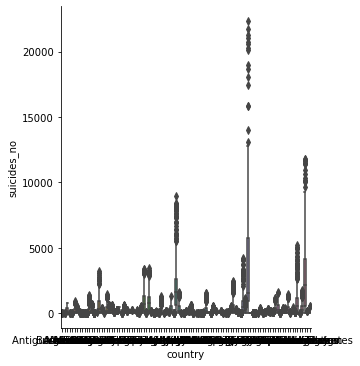

In [17]:
plt.figure(figsize=(20,15))
sns.catplot(x='country', y='suicides_no', kind='box', data=data);

C:\Users\cgunn\Anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


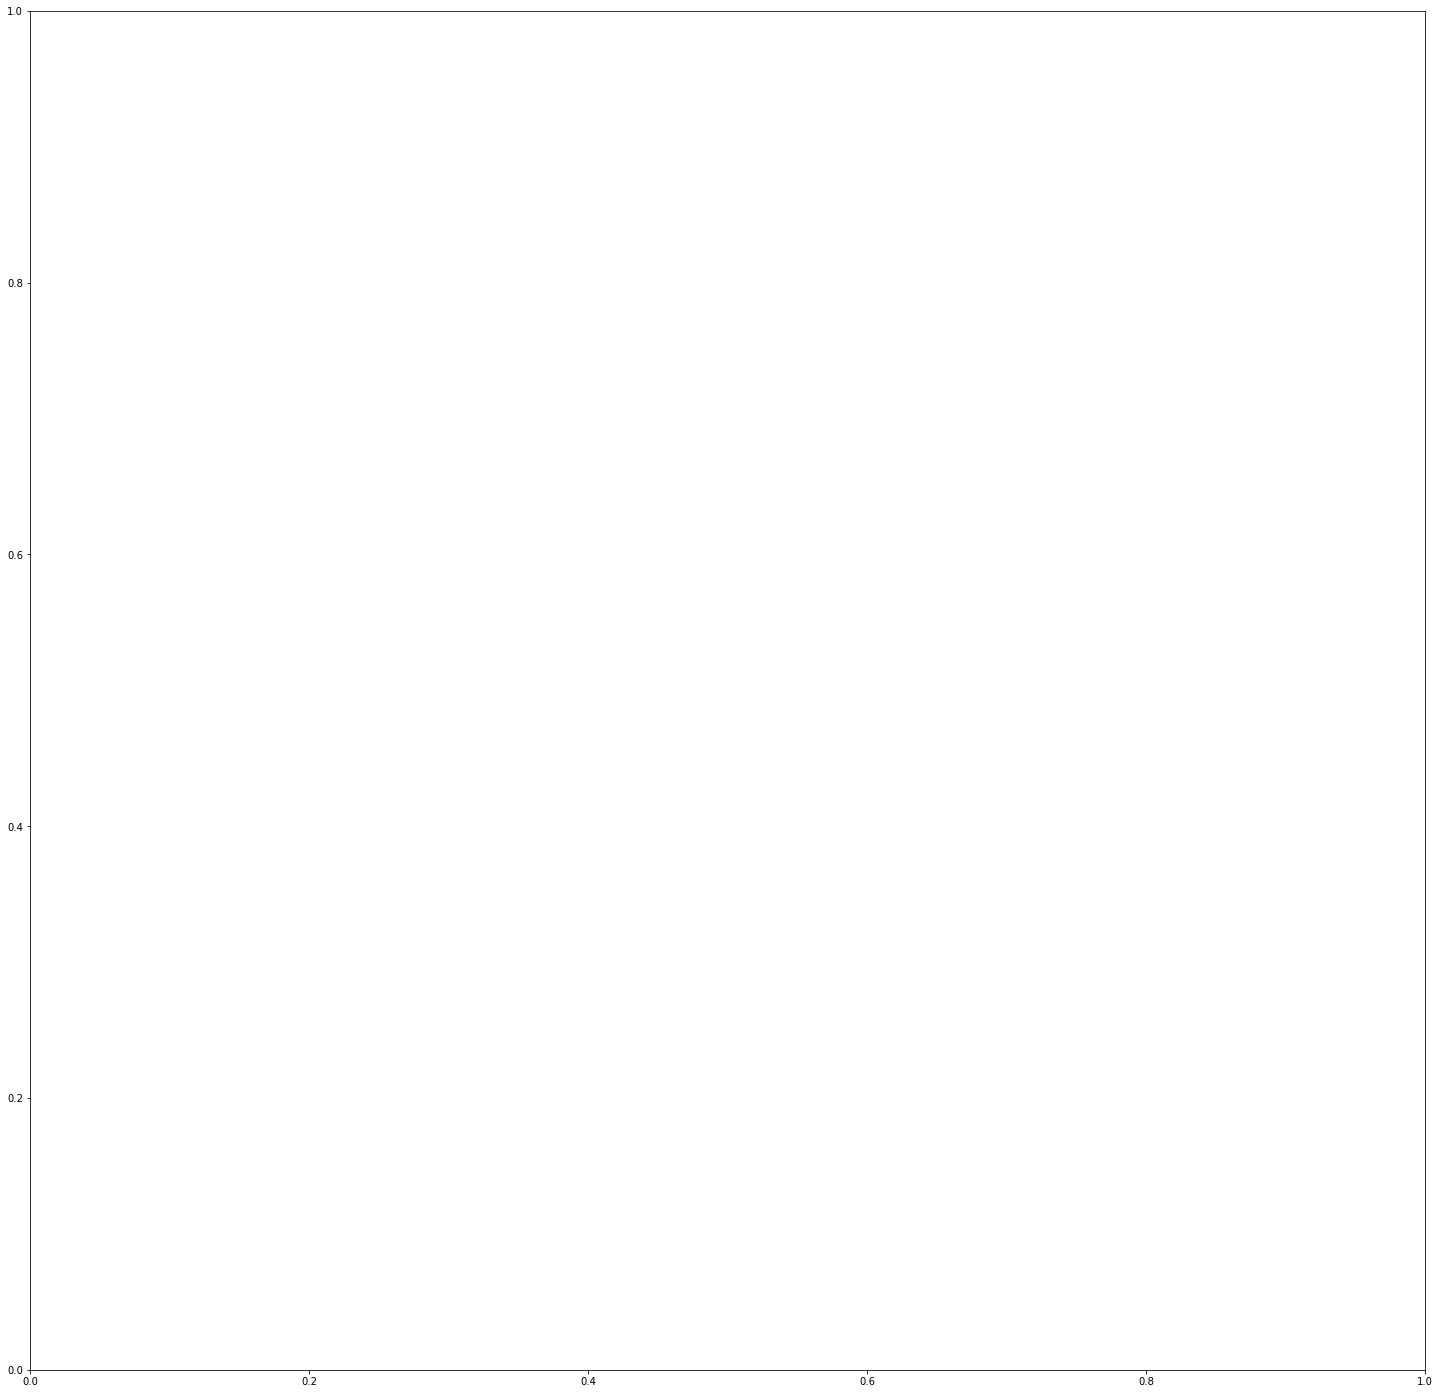

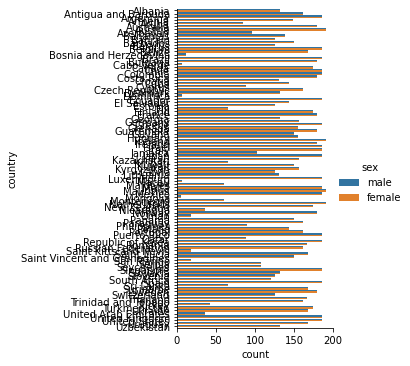

In [18]:
#plt.figure(figsize=(100,100))
fig, ax = plt.subplots(figsize=(25,25))
sns.catplot(y='country', hue='sex', kind='count', data=data, ax=ax);

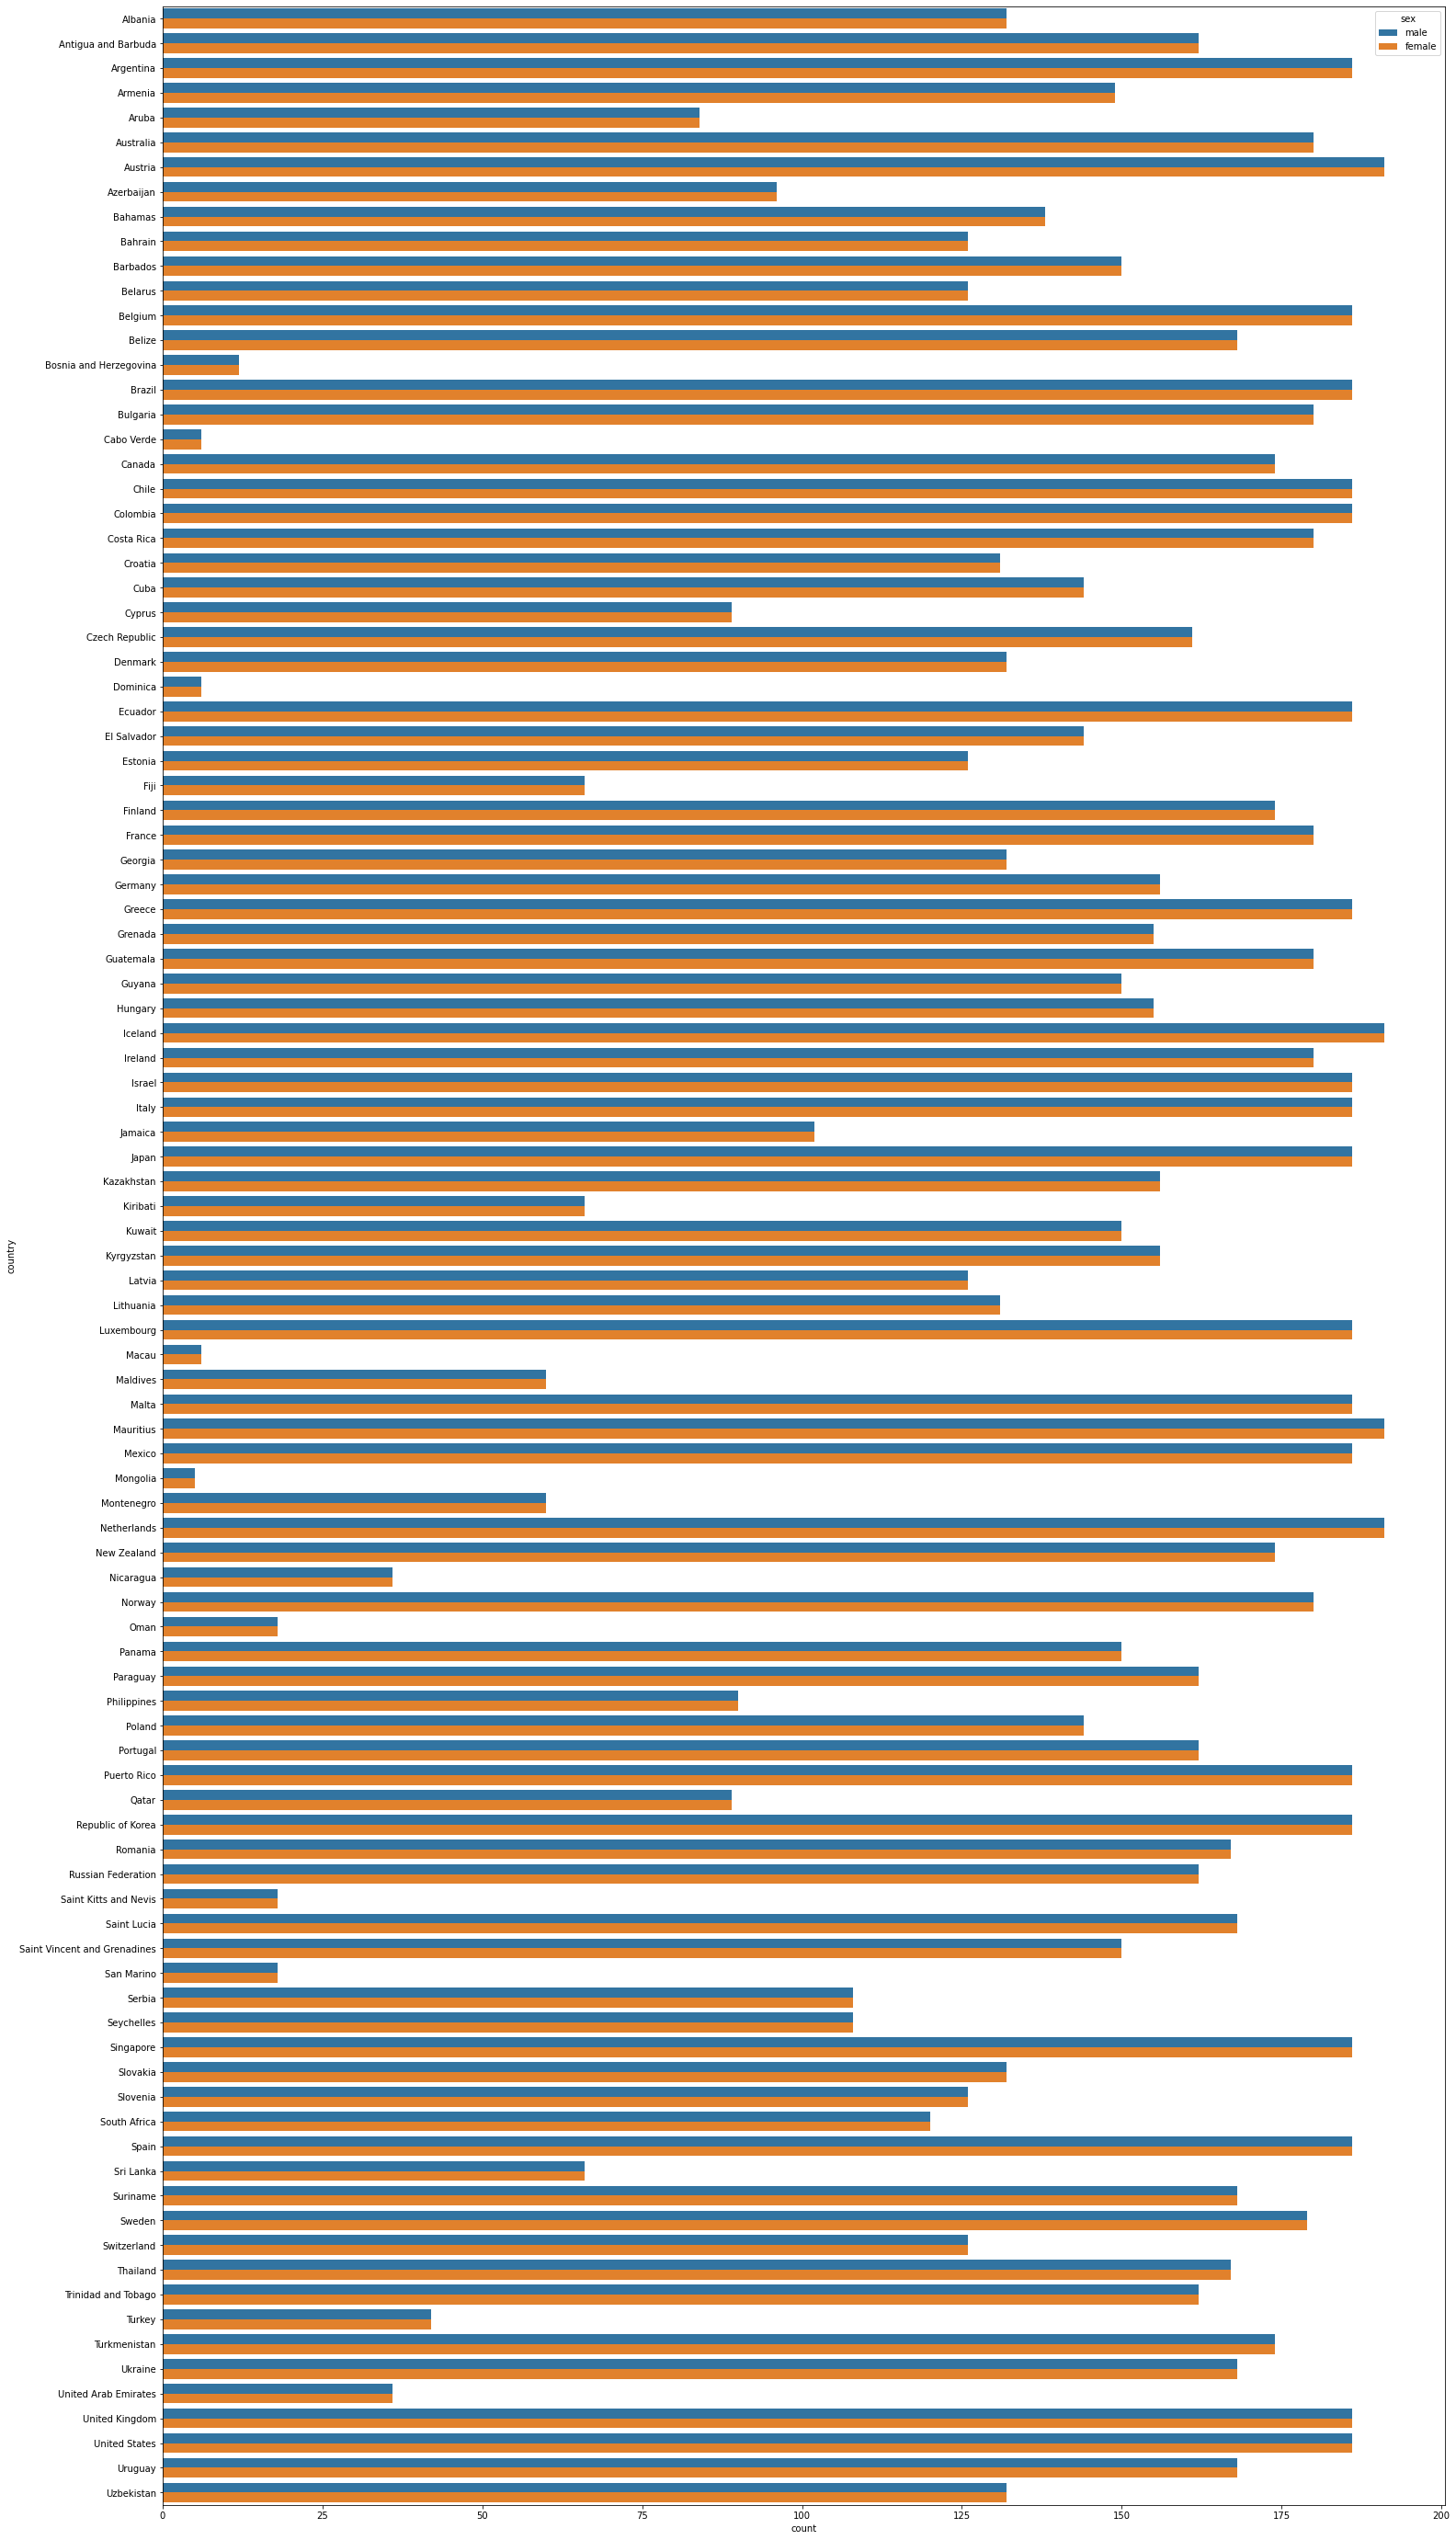

In [19]:
#plt.figure(figsize=(150,150))
fig, ax = plt.subplots(figsize=(25,50))
sorted_country = sorted(data['country'])
sns.countplot(y='country', hue='sex', data=data, ax=ax);

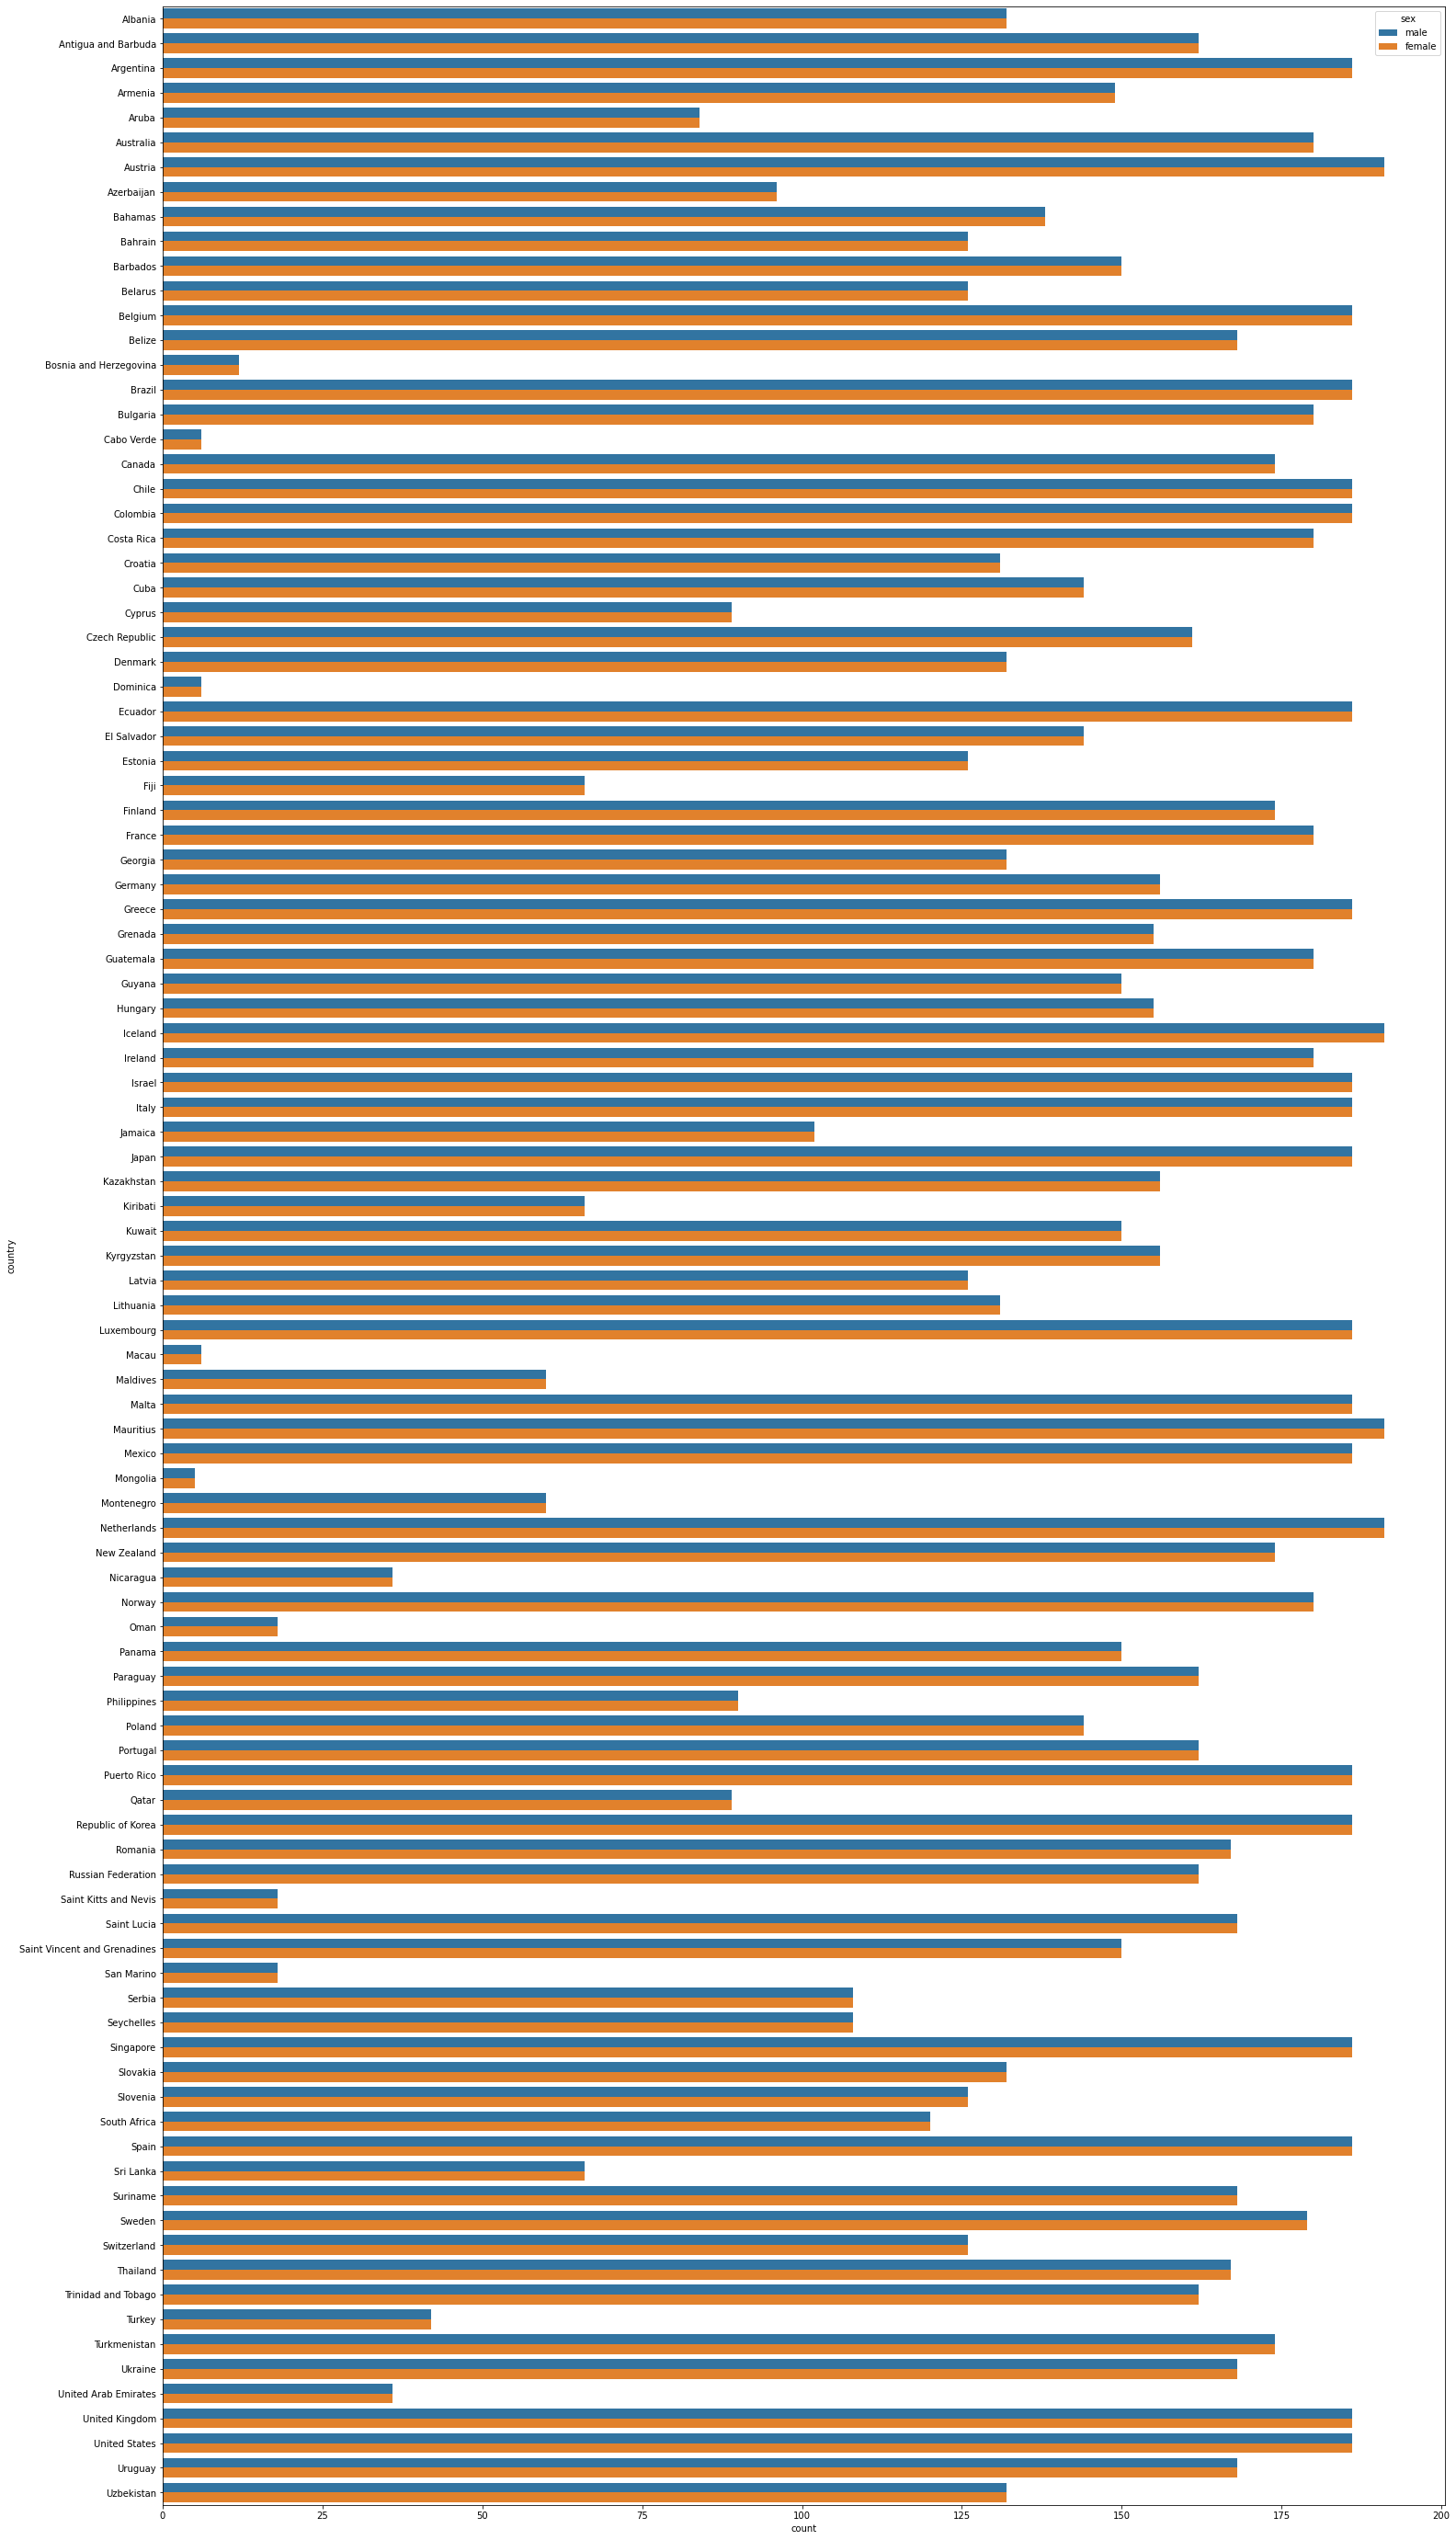

In [20]:
fig, ax = plt.subplots(figsize=(25,50))
data_sorted = data.sort_values(['country'], inplace=True)
sns.countplot(y='country', hue='sex', data=data, ax=ax);

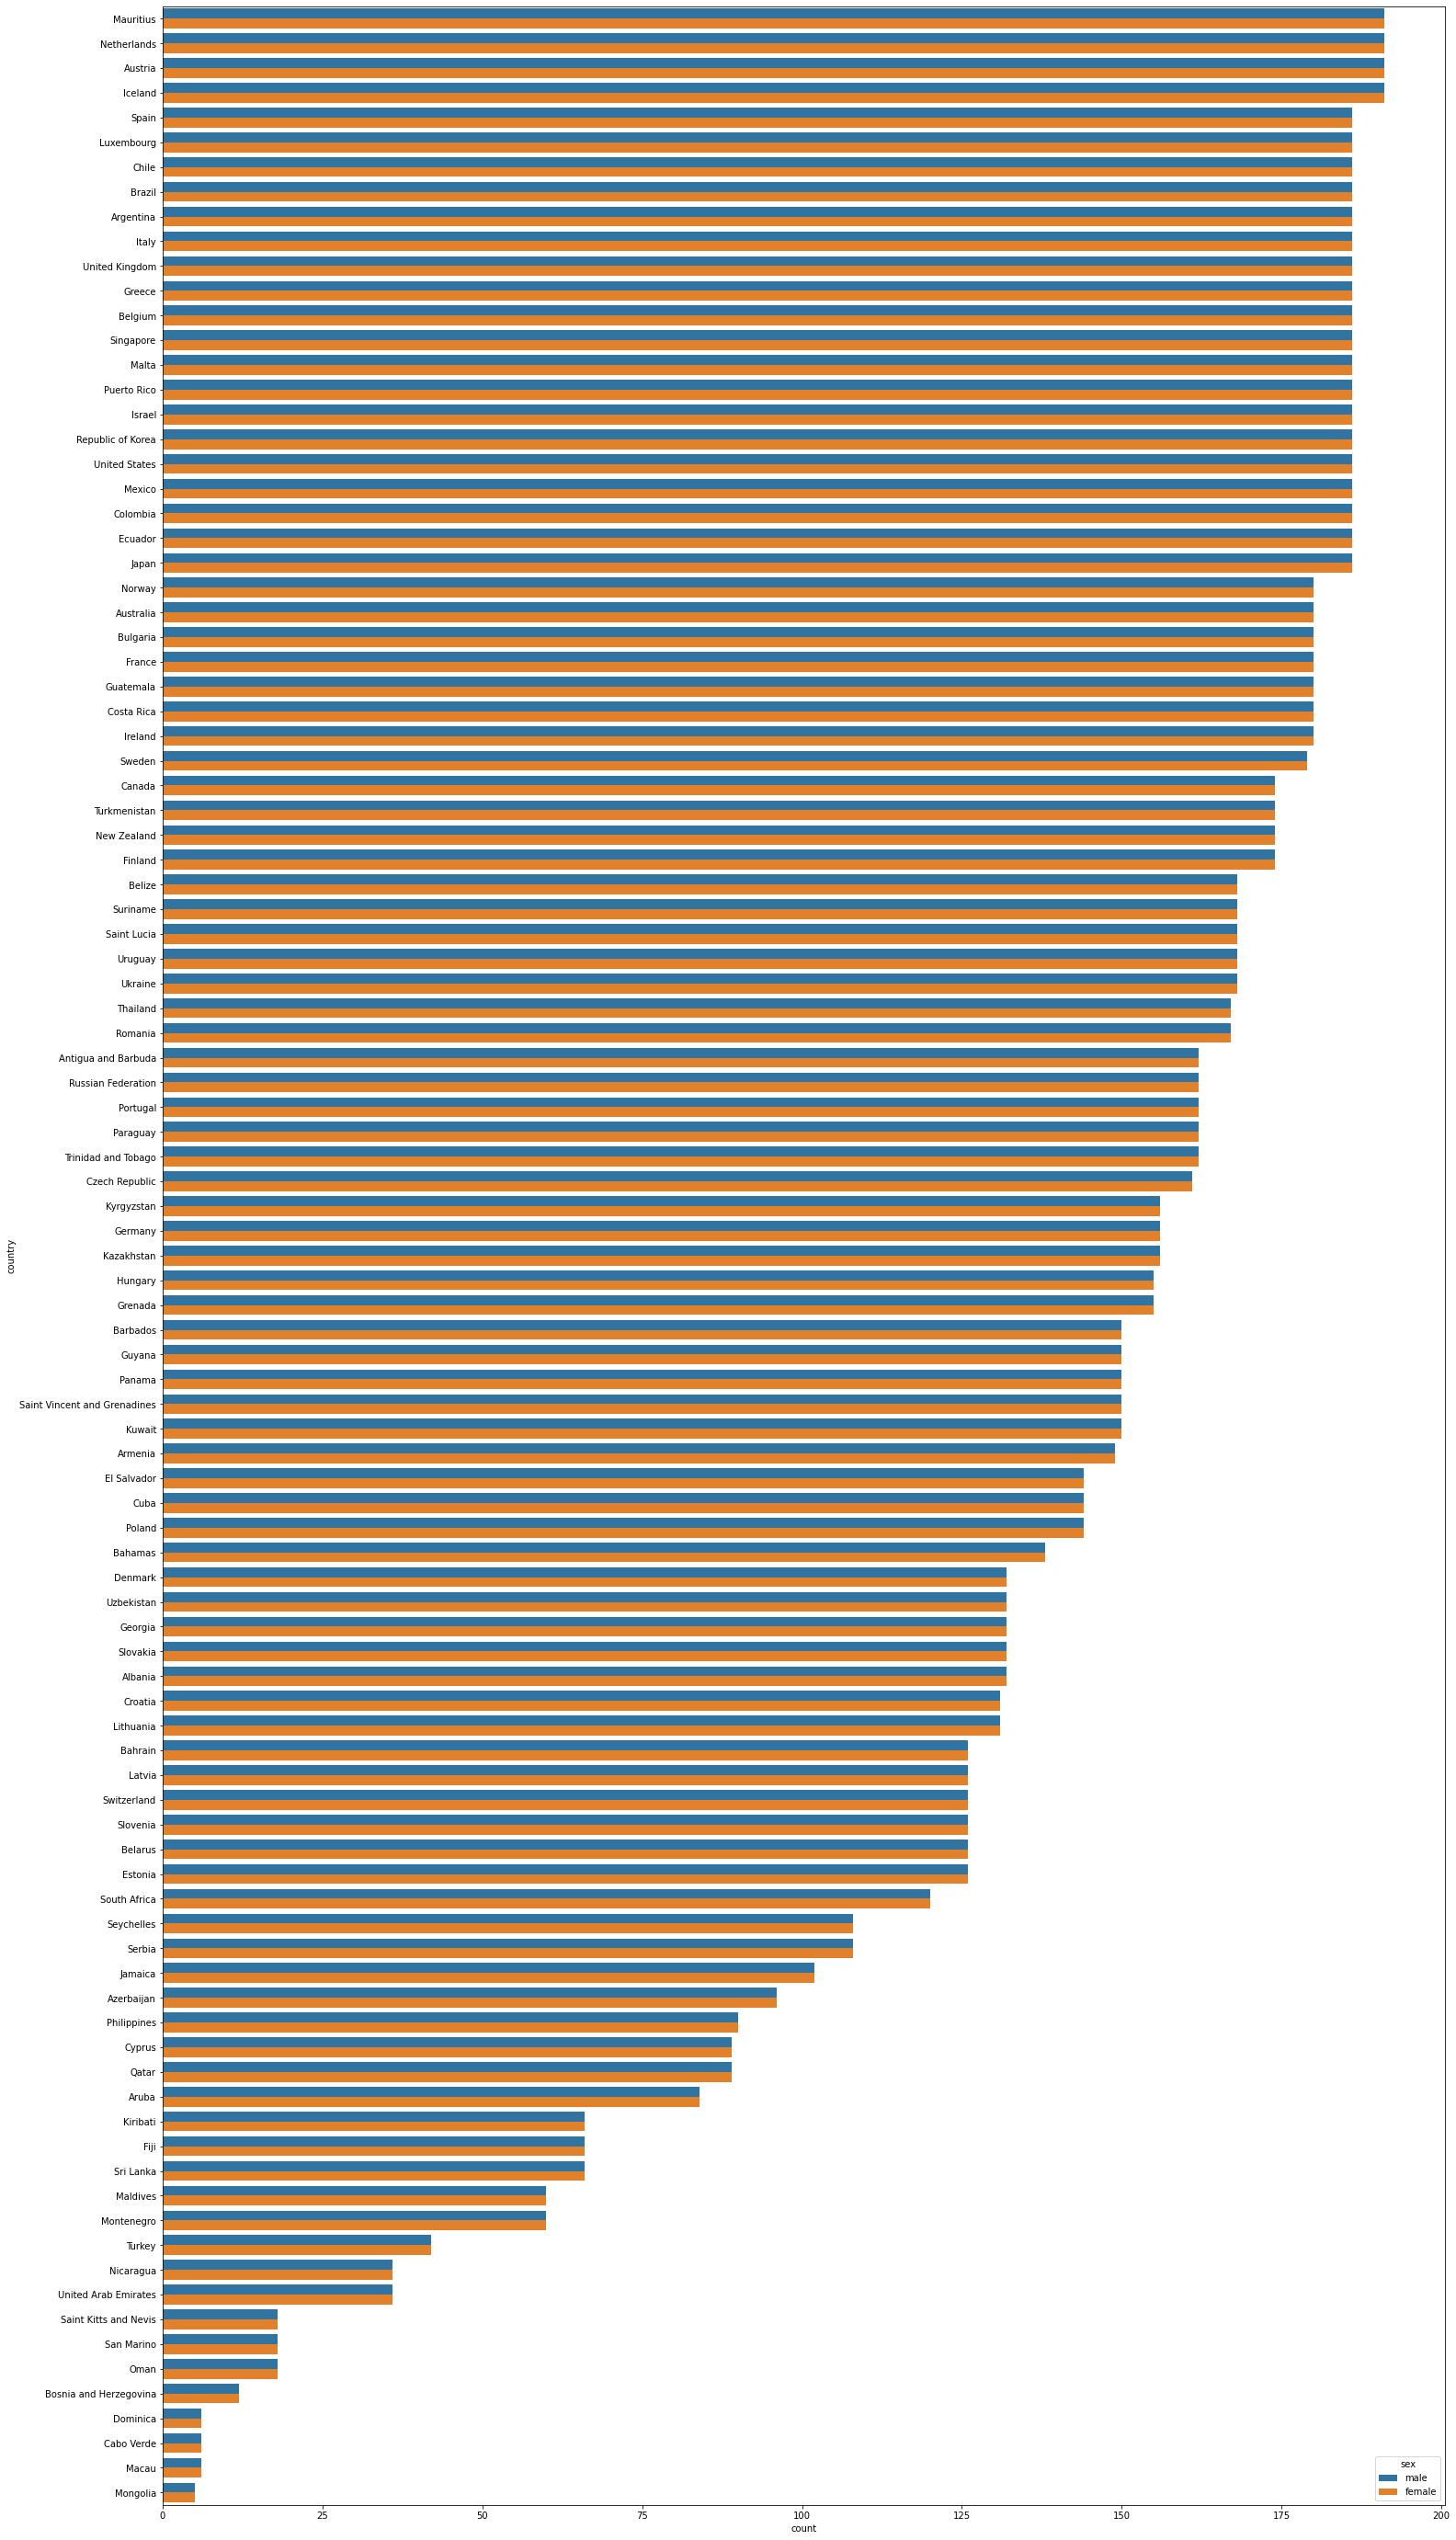

In [21]:
fig, ax = plt.subplots(figsize=(25,50))
#data_sorted = data.sort_values(['country'], inplace=True)
sns.countplot(y='country', hue='sex', data=data, order = data['country'].value_counts().index, ax=ax);

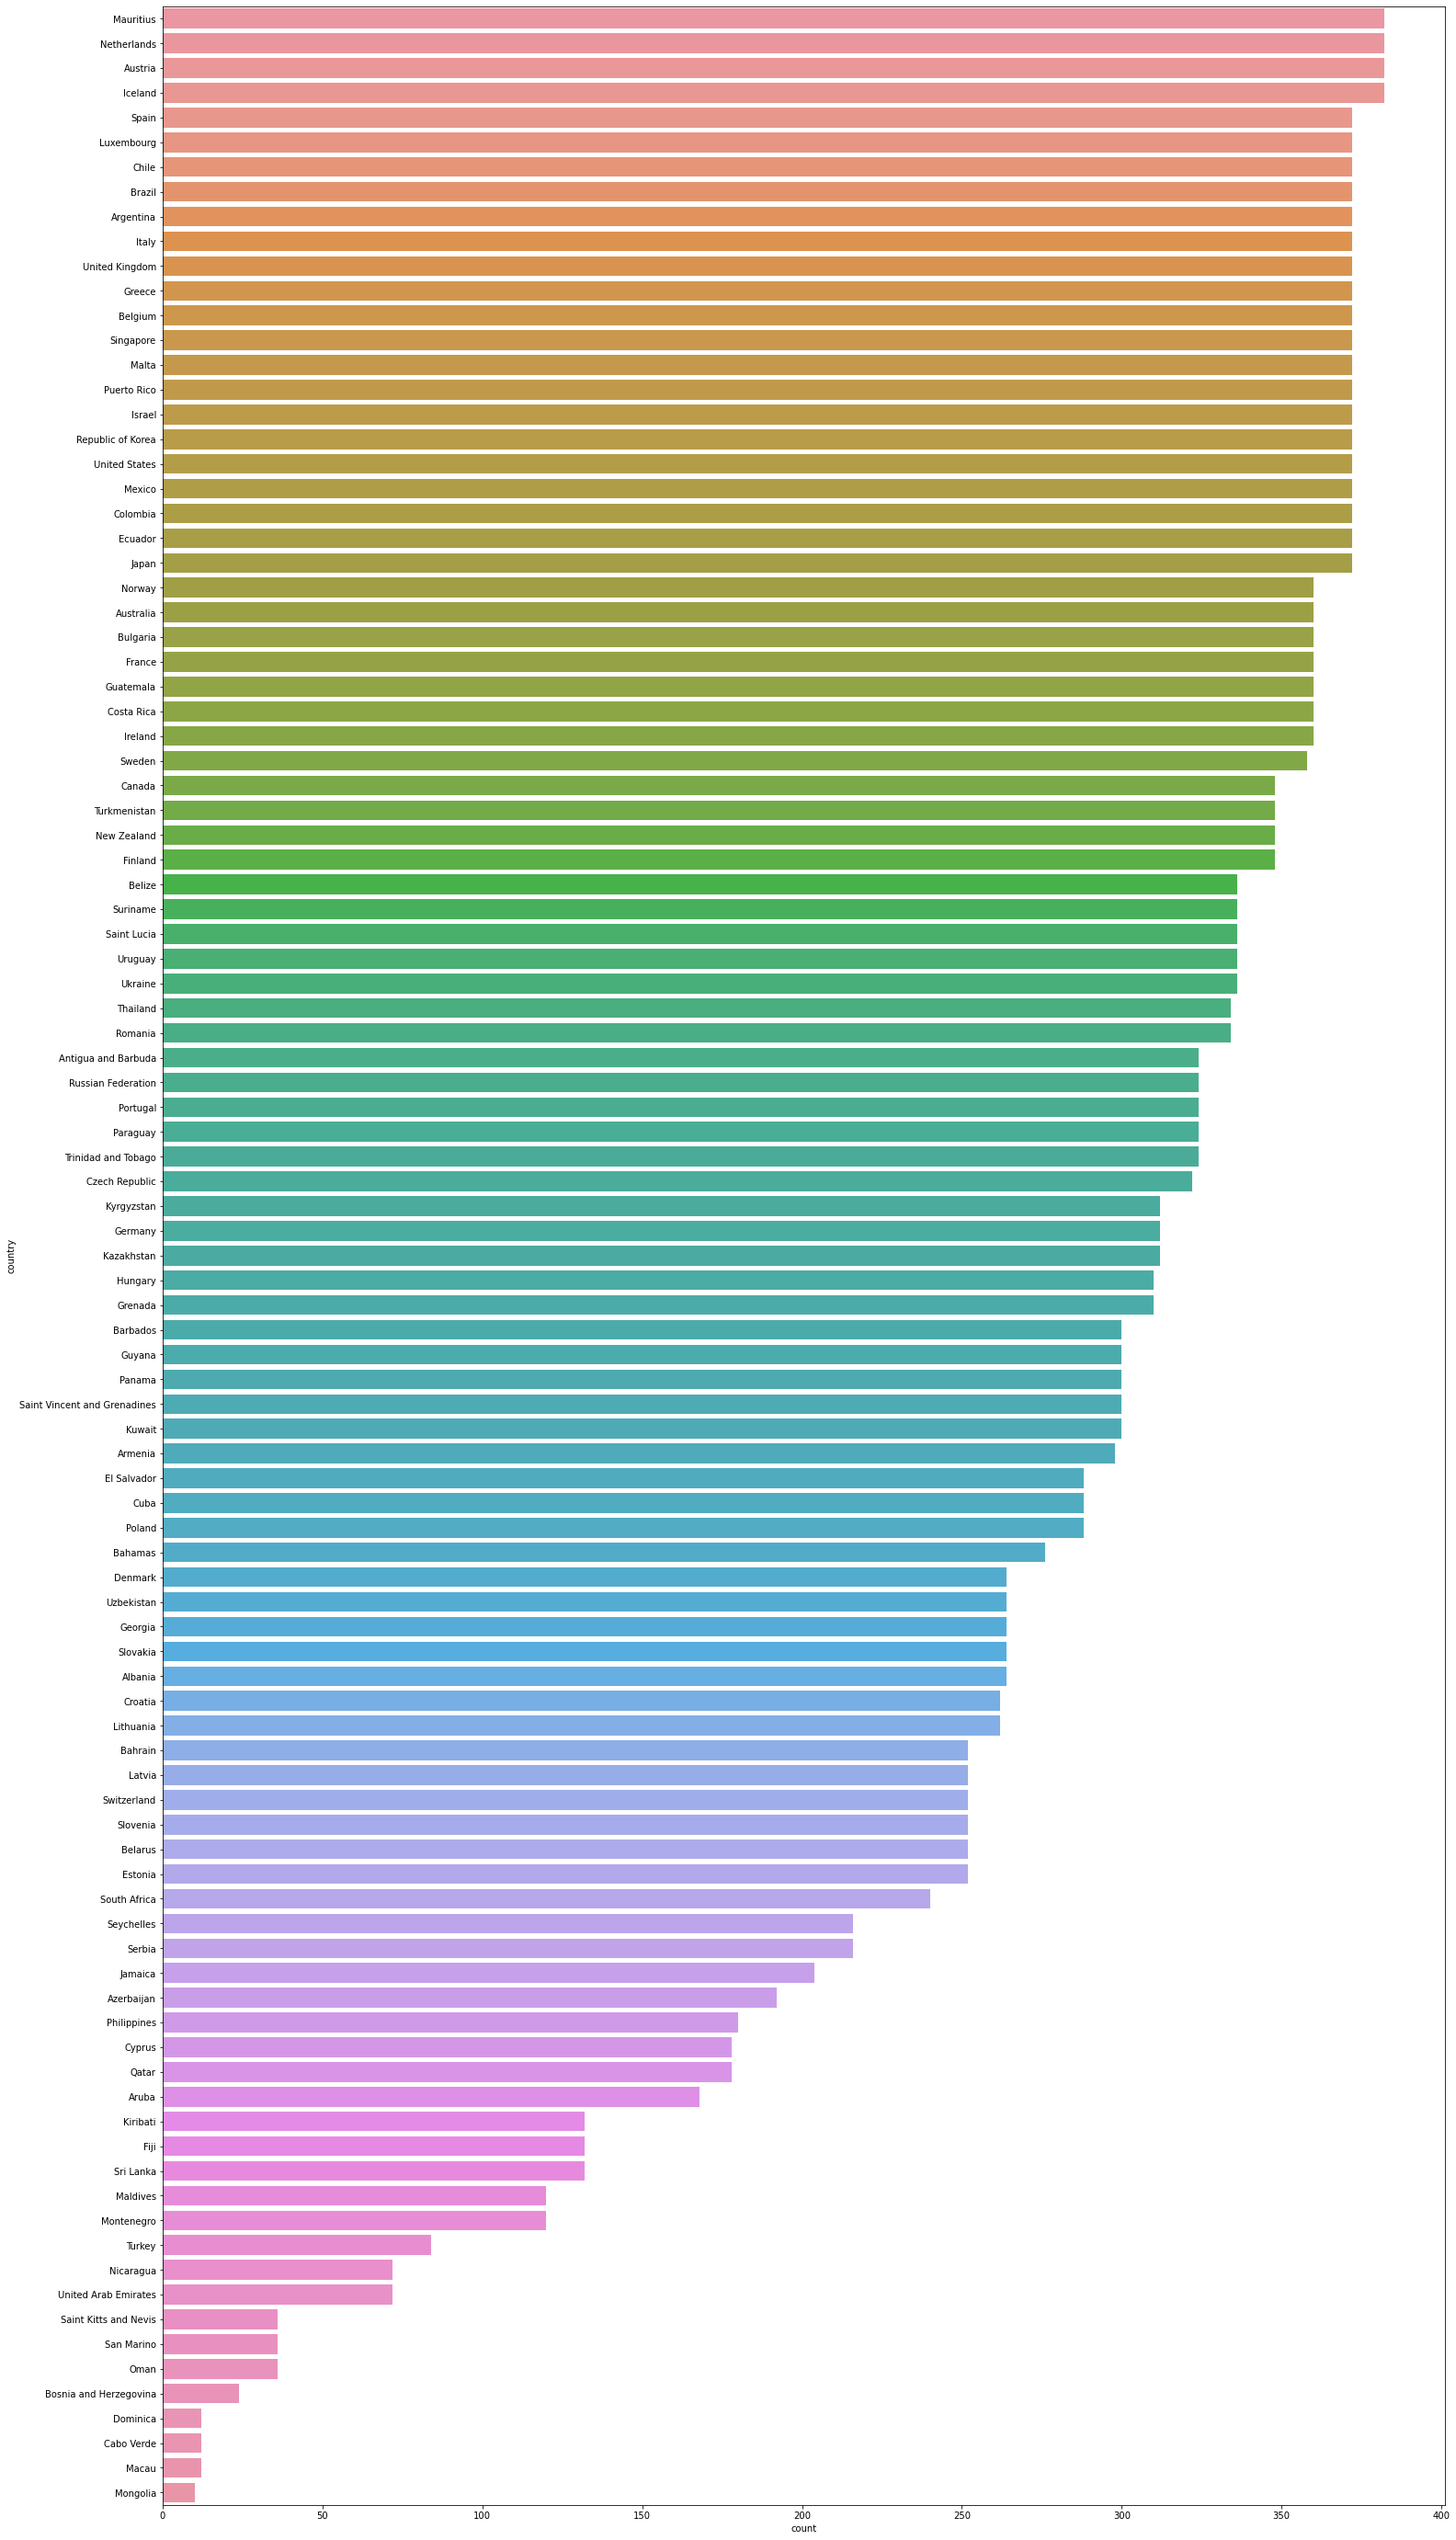

In [22]:
fig, ax = plt.subplots(figsize=(25,50))
#data_sorted = data.sort_values(['country'], inplace=True)
sns.countplot(y='country', data=data, order = data['country'].value_counts().index, ax=ax);

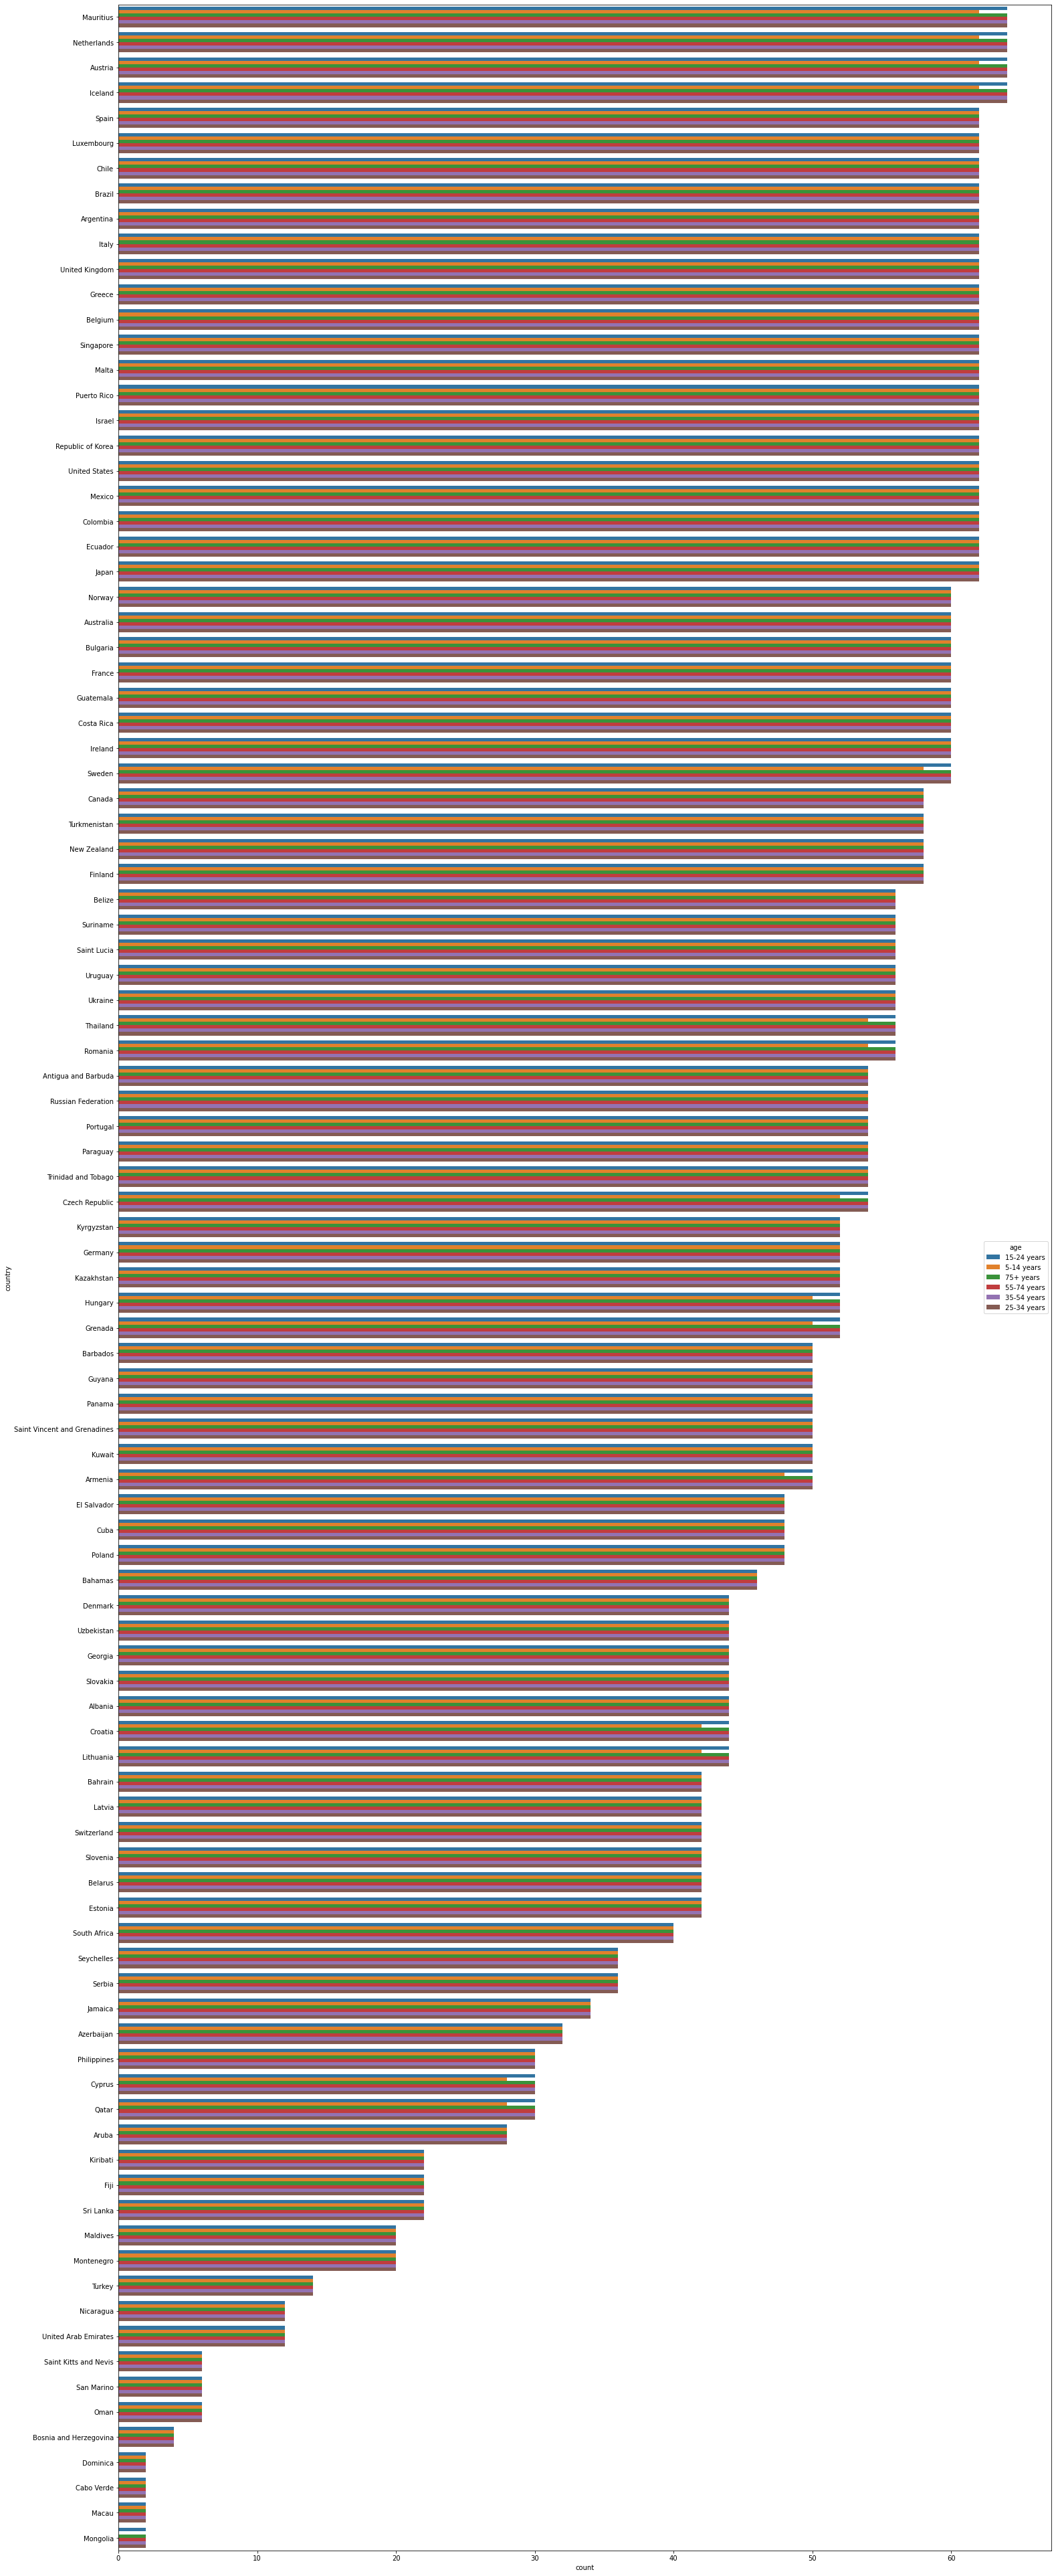

In [23]:
fig, ax = plt.subplots(figsize=(25,70))
#data_sorted = data.sort_values(['country'], inplace=True)
sns.countplot(y='country', hue='age', data=data, order = data['country'].value_counts().index, ax=ax);

## Barplot

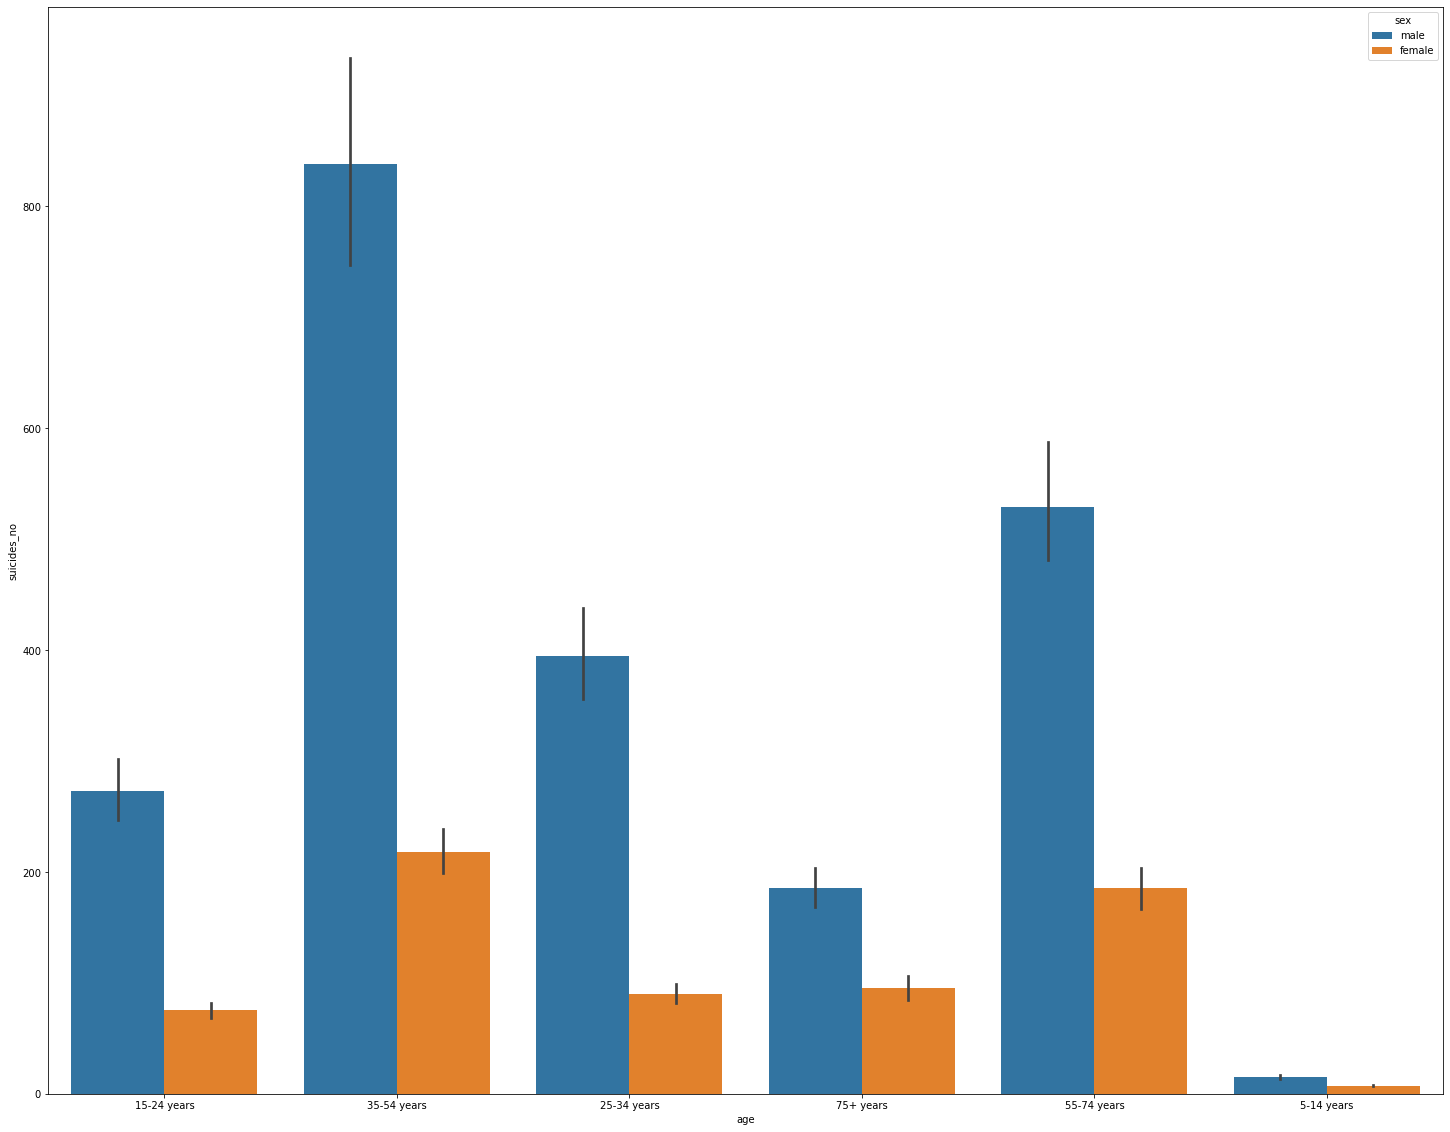

In [24]:
fig, ax = plt.subplots(figsize=(25,20))
#data_sorted = data.sort_values(['country'], inplace=True)
sns.barplot(x='age', y='suicides_no', hue='sex', data=data, order = data['age'].value_counts().index, ax=ax);

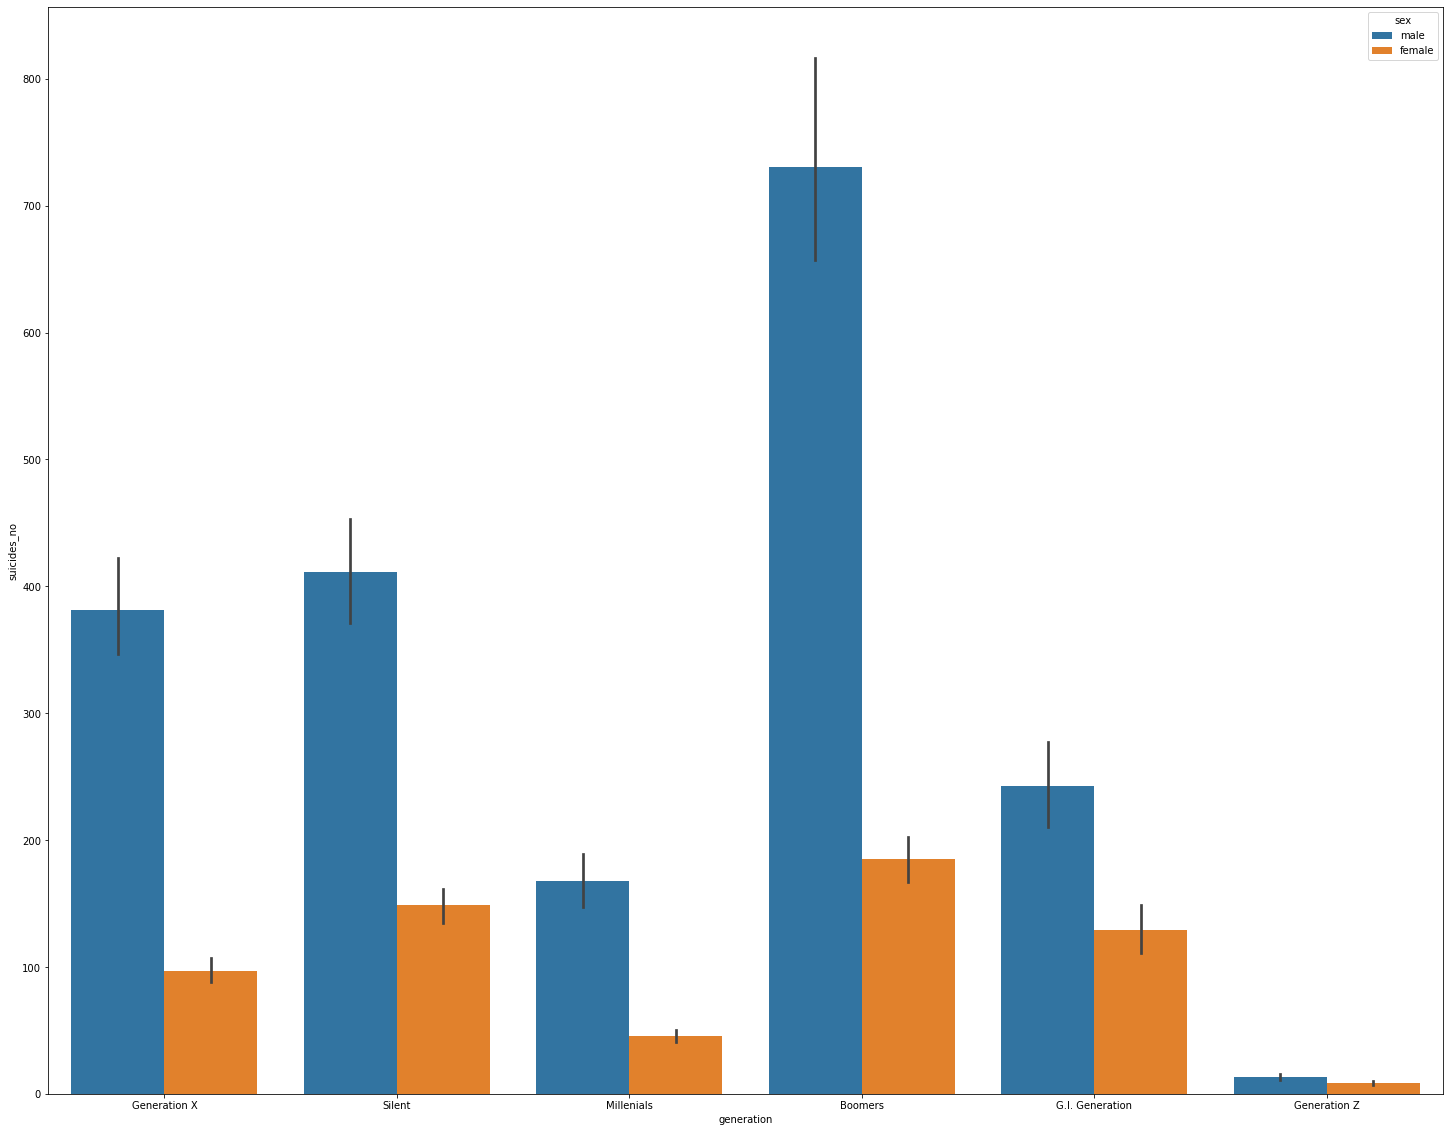

In [25]:
fig, ax = plt.subplots(figsize=(25,20))
#data_sorted = data.sort_values(['country'], inplace=True)
sns.barplot(x='generation', y='suicides_no', hue='sex', data=data, order = data['generation'].value_counts().index, ax=ax);

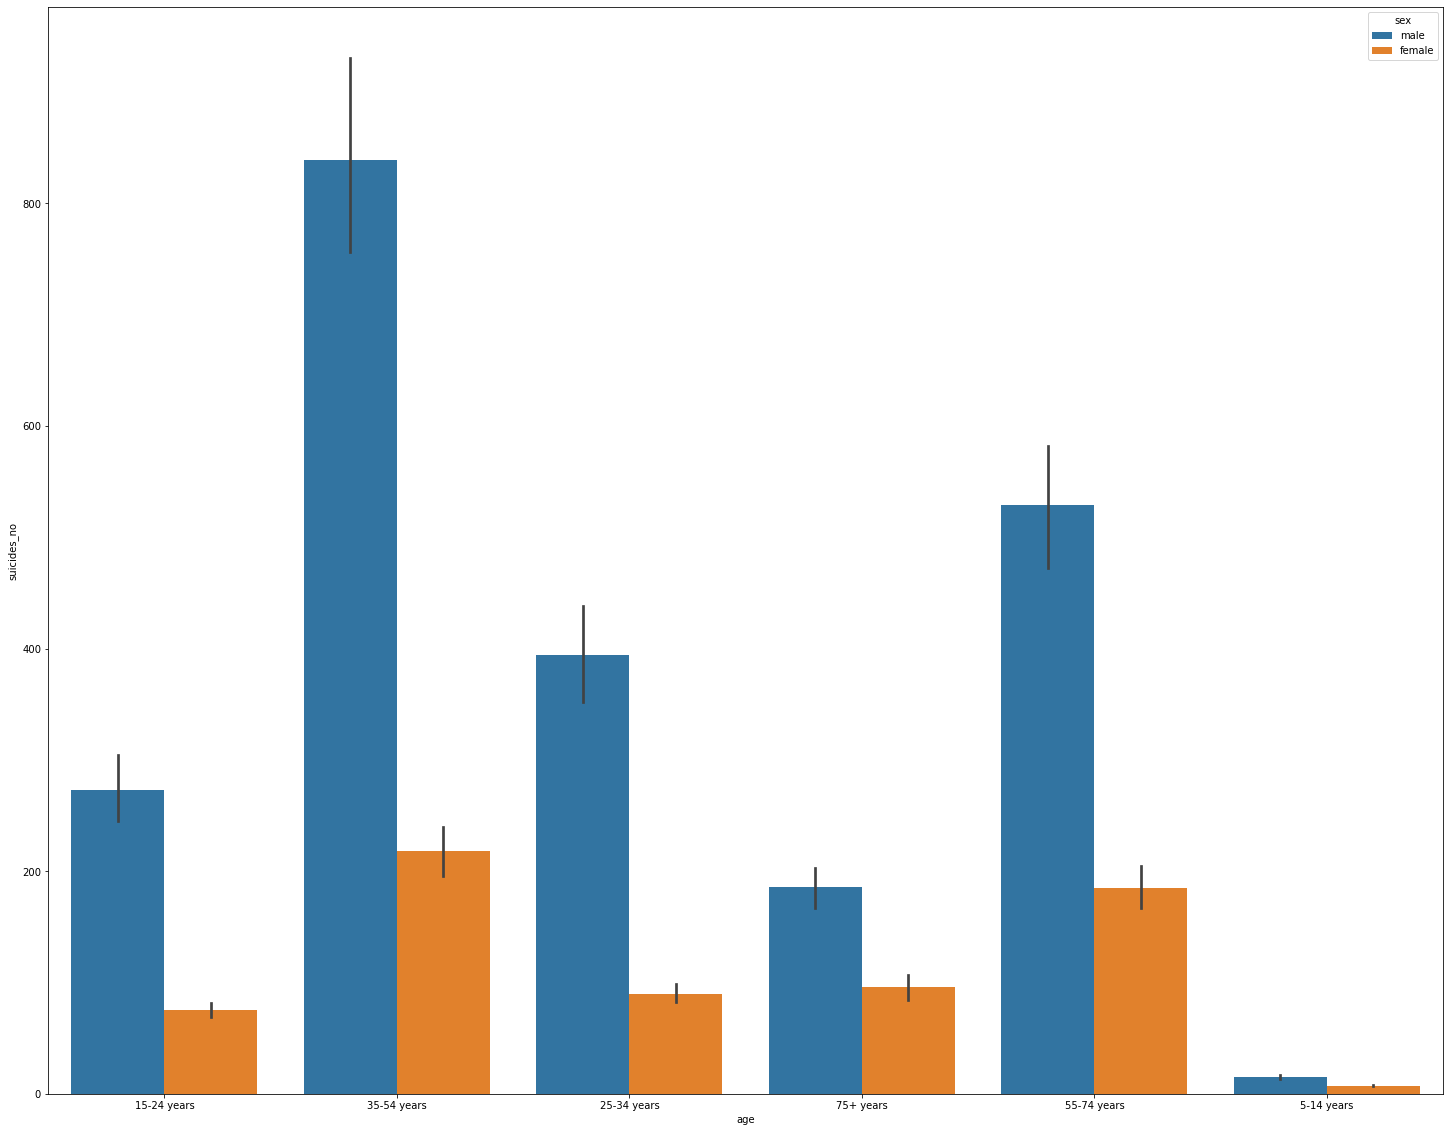

In [26]:
fig, ax = plt.subplots(figsize=(25,20))
#data_sorted = data.sort_values(['country'], inplace=True)
sns.barplot(x='age', y='suicides_no', hue='sex', data=data, order = data['age'].value_counts().index, ax=ax);

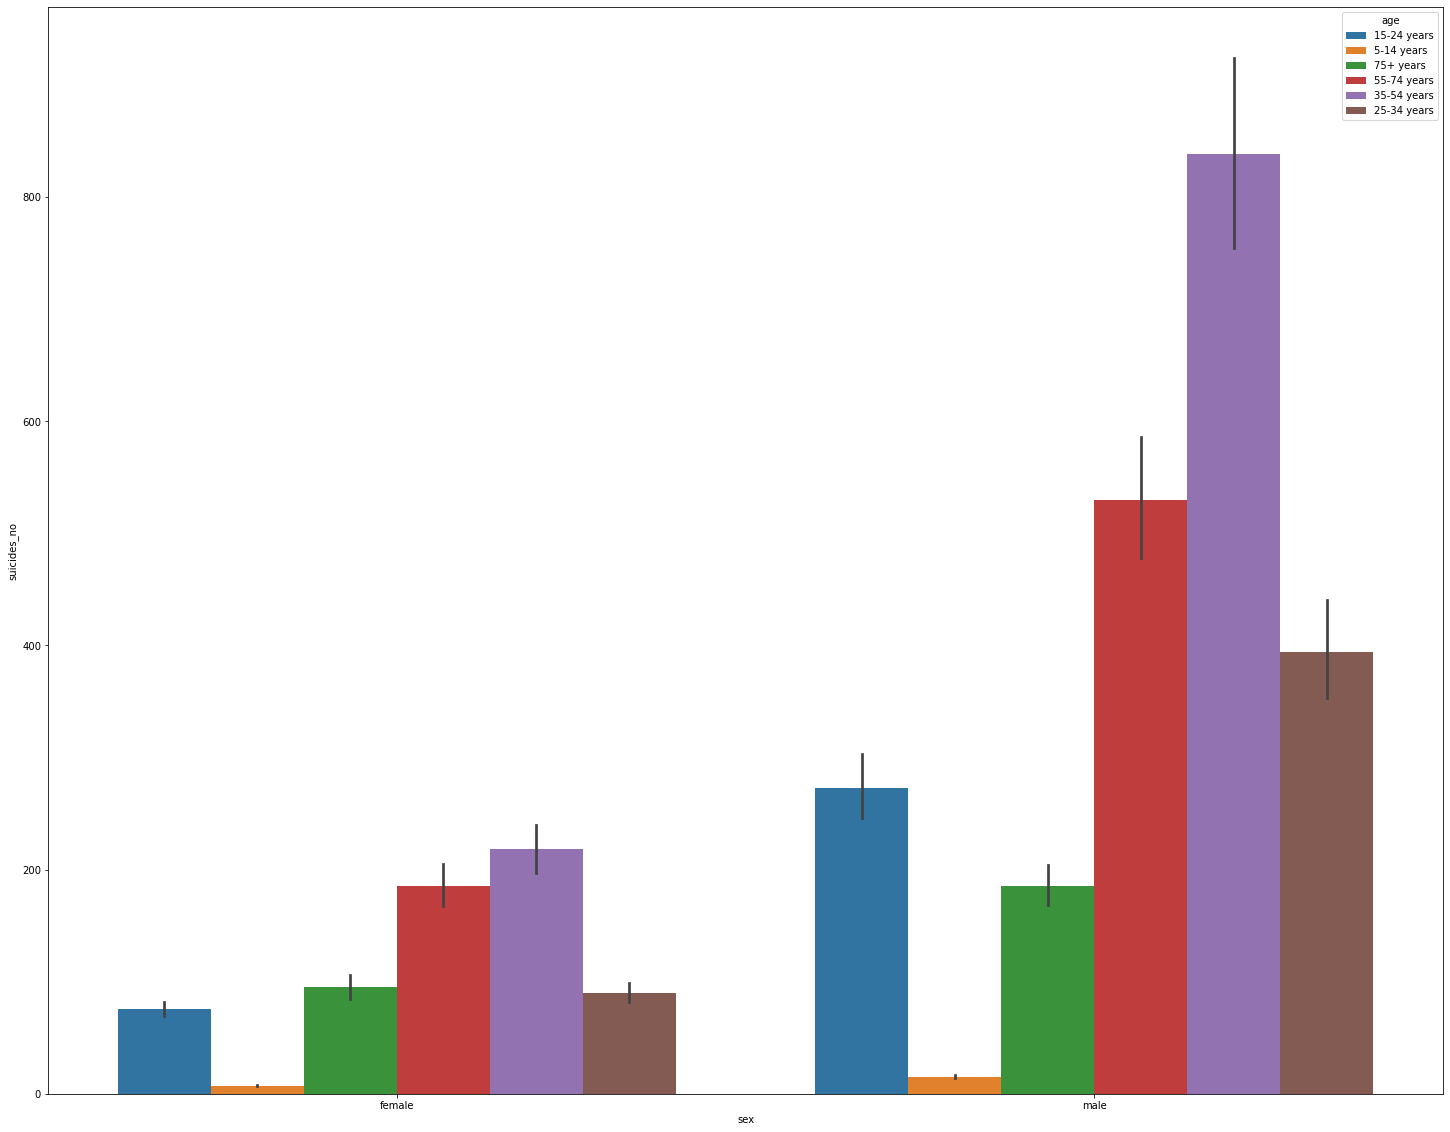

In [27]:
fig, ax = plt.subplots(figsize=(25,20))
#data_sorted = data.sort_values(['country'], inplace=True)
sns.barplot(x='sex', y='suicides_no', hue='age', data=data, order = data['sex'].value_counts().index, ax=ax);

### Numerical Vs Numerical : Scatter plot

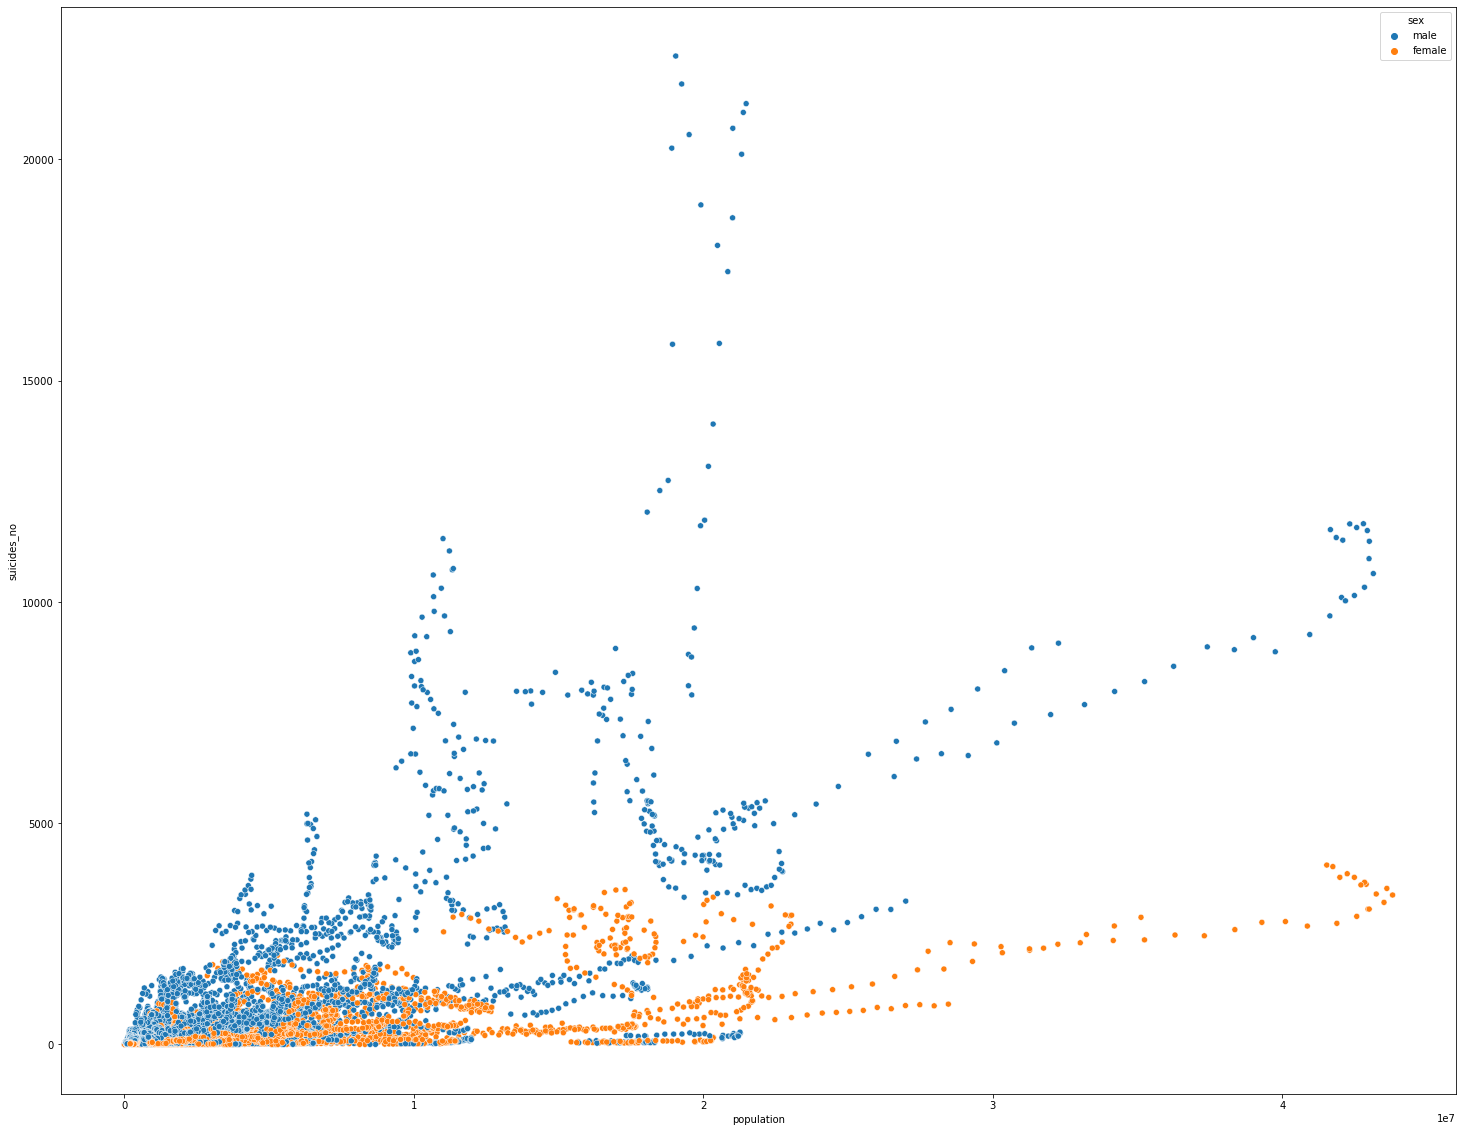

In [28]:
fig, ax = plt.subplots(figsize=(25,20))
#data_sorted = data.sort_values(['country'], inplace=True)
sns.scatterplot(x='population', y='suicides_no', hue='sex', data=data, ax=ax);

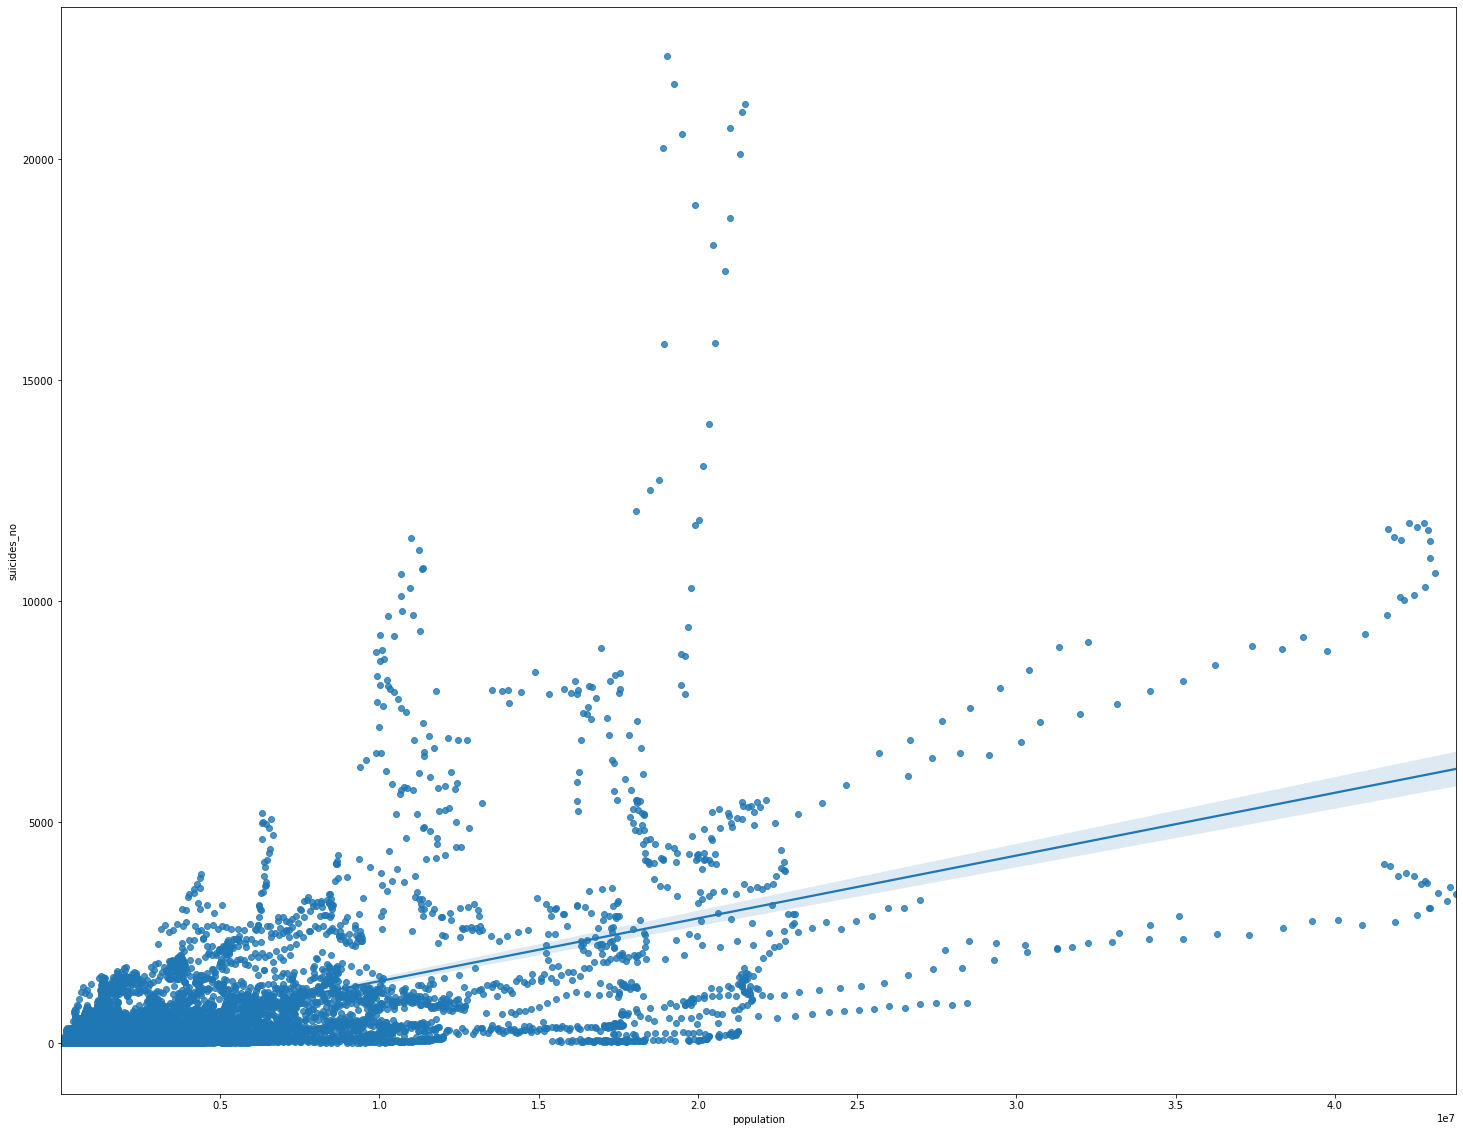

In [29]:
fig, ax = plt.subplots(figsize=(25,20))
#data_sorted = data.sort_values(['country'], inplace=True)
sns.regplot(x='population', y='suicides_no', data=data, ax=ax);

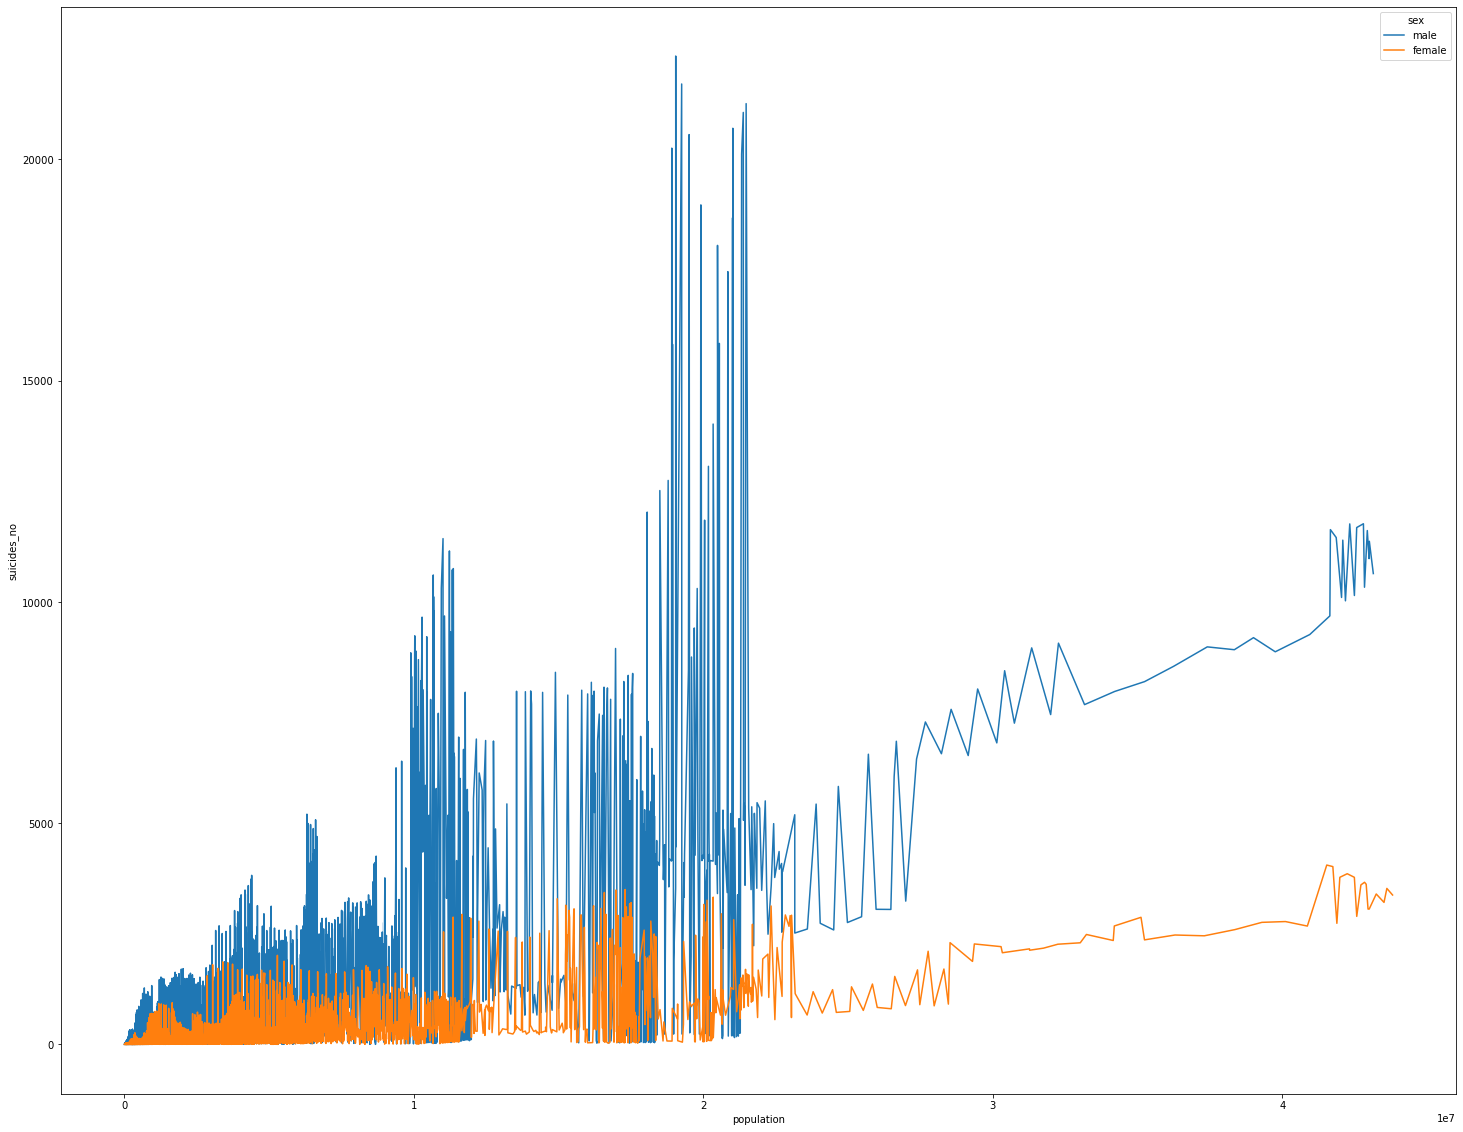

In [30]:
fig, ax = plt.subplots(figsize=(25,20))
#data_sorted = data.sort_values(['country'], inplace=True)
sns.lineplot(x='population', y='suicides_no', hue='sex', data=data, ax=ax);

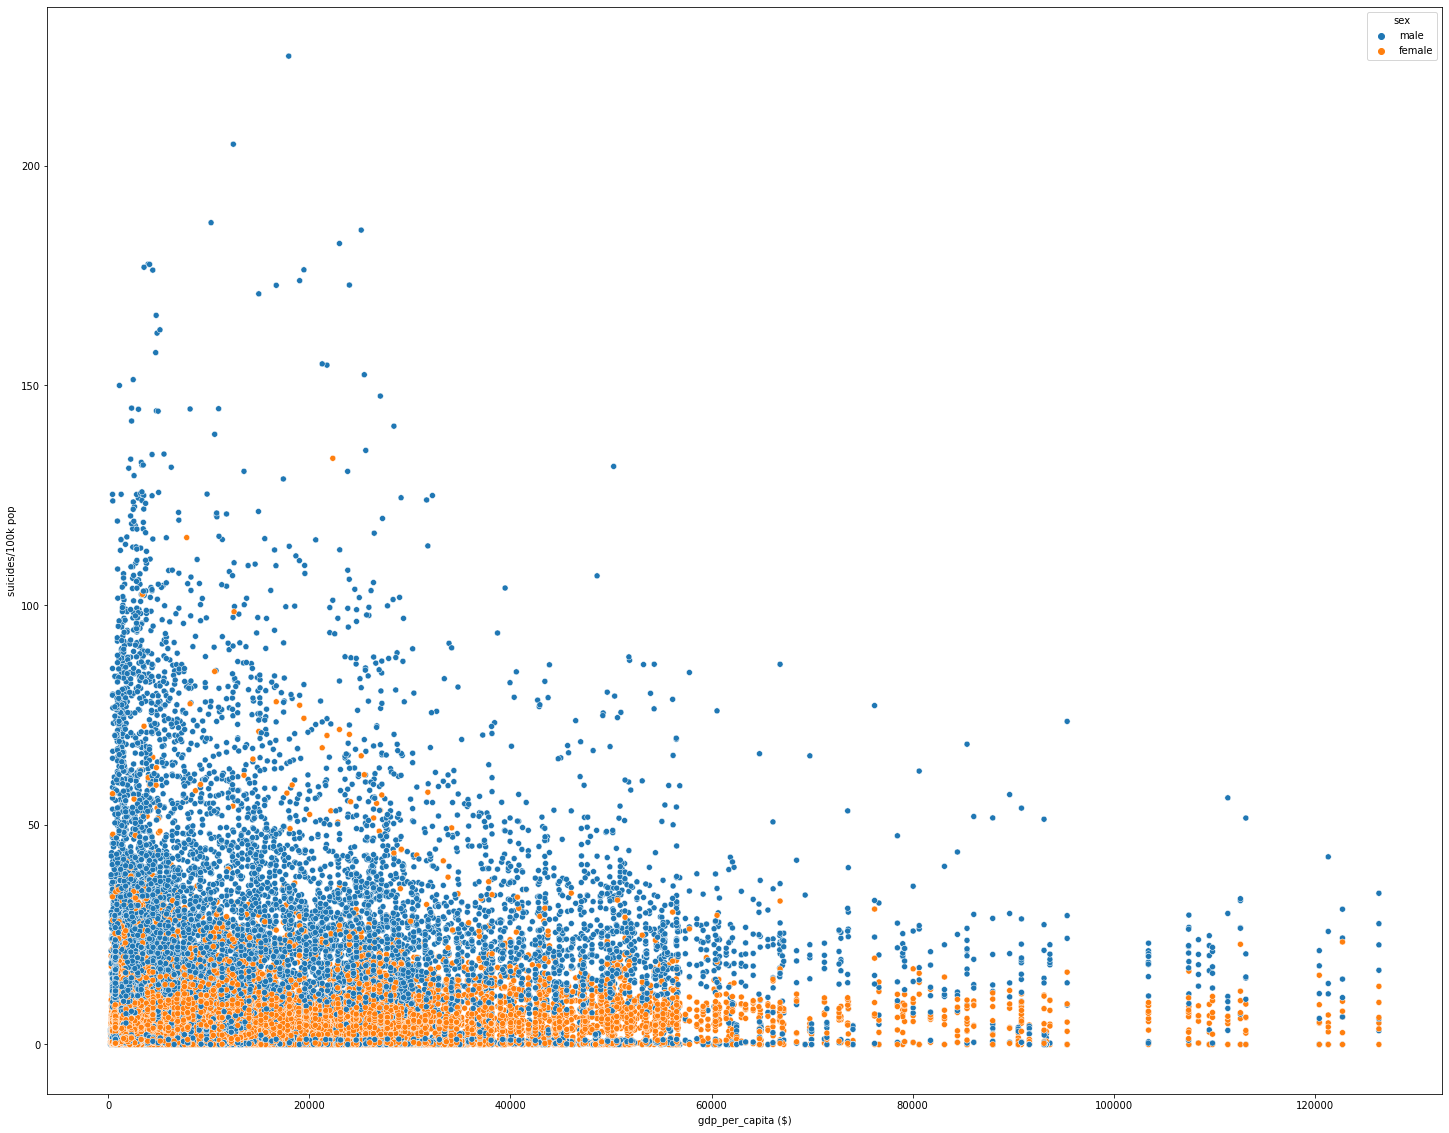

In [31]:
fig, ax = plt.subplots(figsize=(25,20))
#data_sorted = data.sort_values(['country'], inplace=True)
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', hue='sex', data=data, ax=ax);

### Check coorelations bet variable

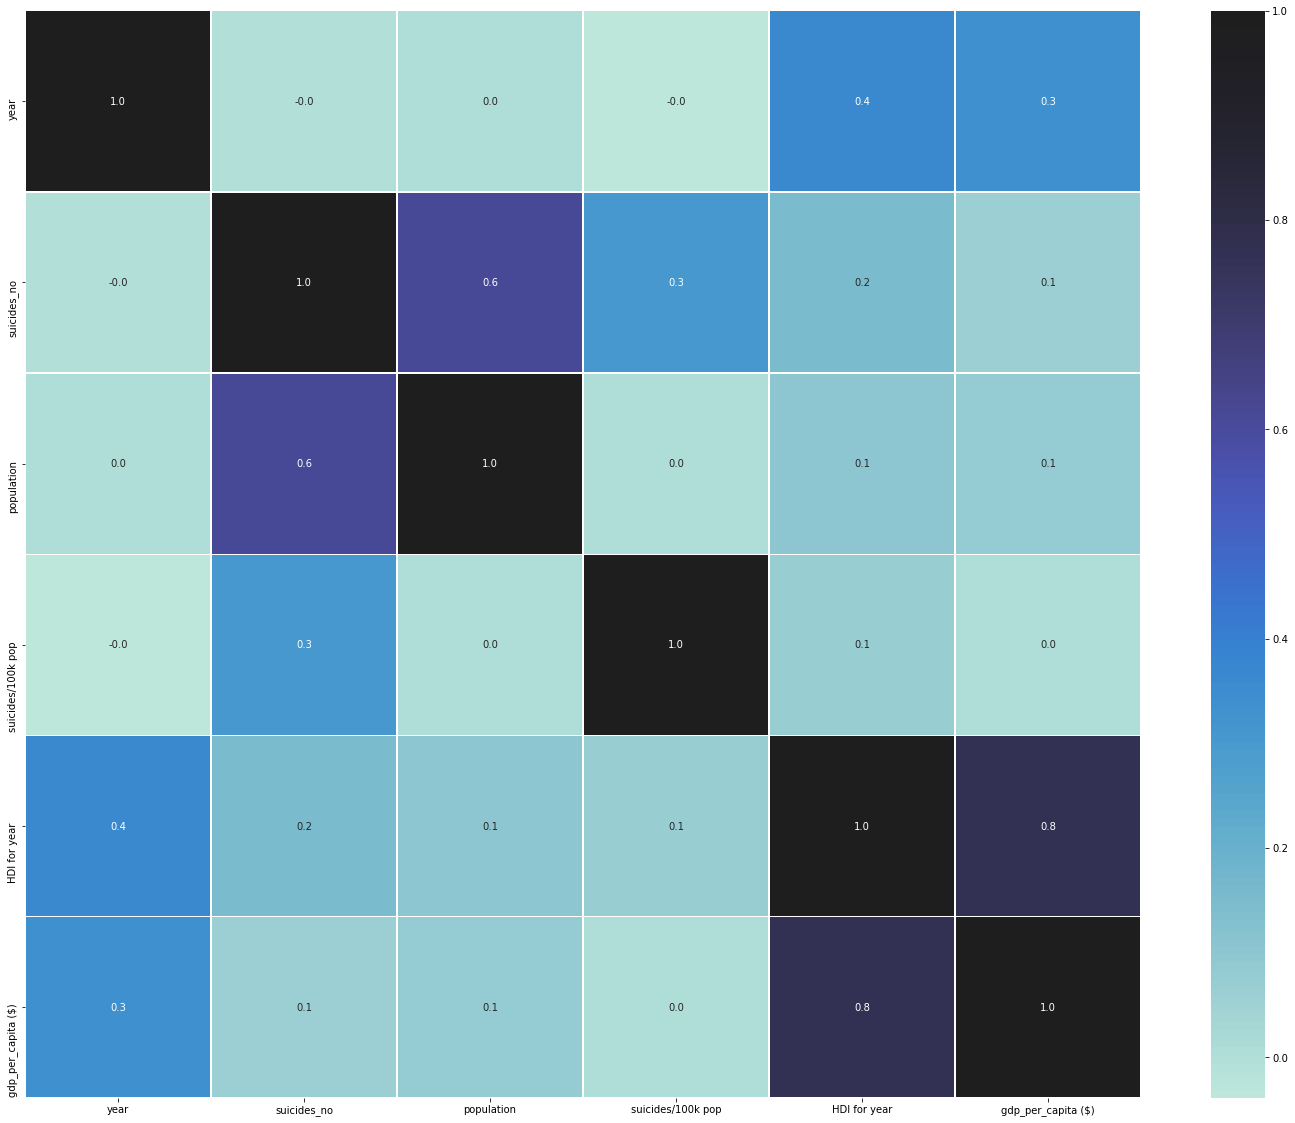

In [32]:
fig, ax = plt.subplots(figsize=(25,20))
#data_sorted = data.sort_values(['country'], inplace=True)
sns.heatmap(data.corr() ,annot=True, linewidths=.5, fmt= '.1f', center=1, ax=ax);

## Average no of suicides across generations

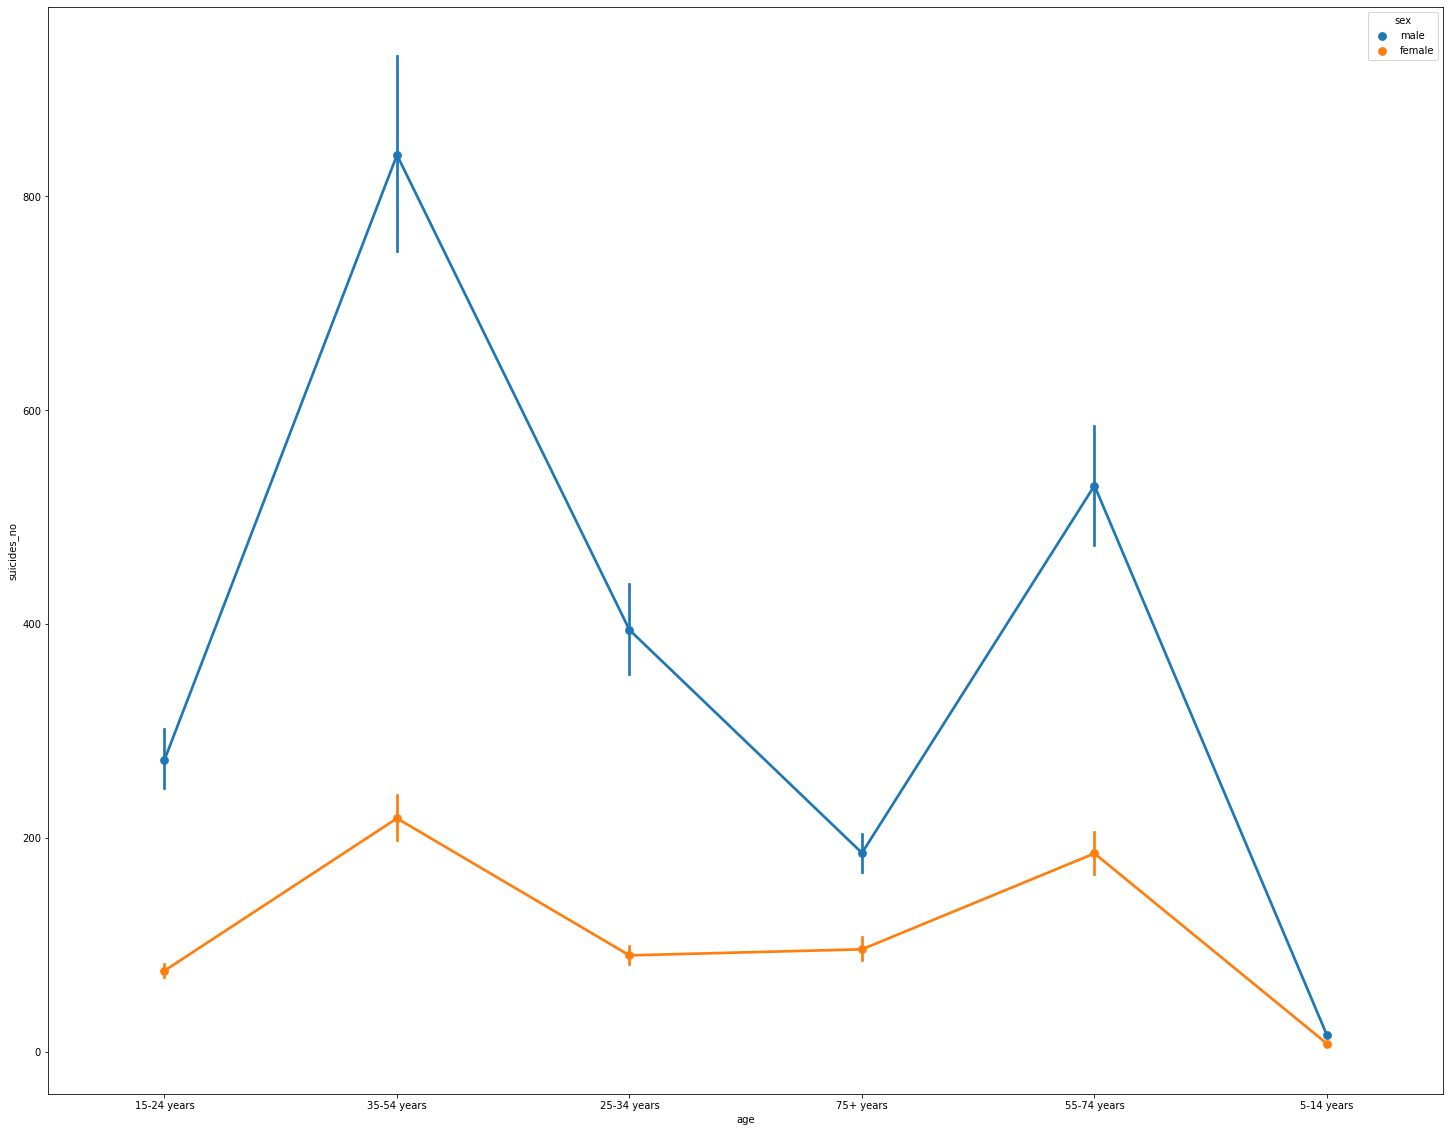

In [33]:
fig, ax = plt.subplots(figsize=(25,20))
#data_sorted = data.sort_values(['country'], inplace=True)
sns.pointplot(x='age', y='suicides_no', hue='sex', data=data, order = data['age'].value_counts().index, ax=ax);

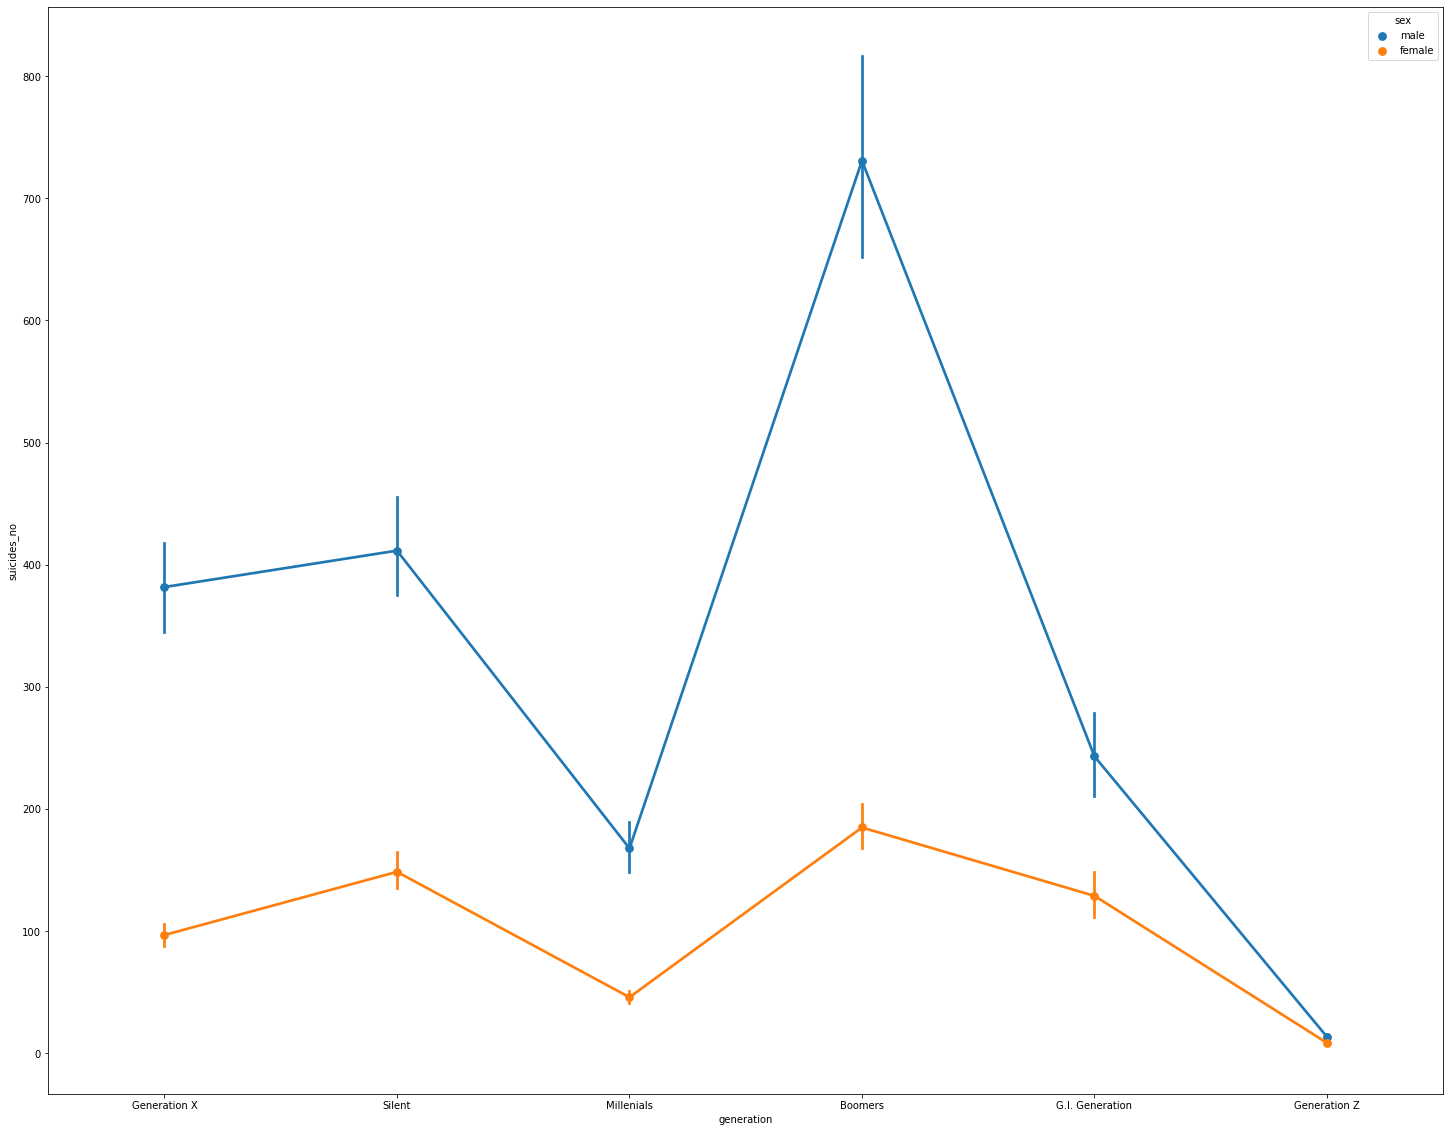

In [34]:
fig, ax = plt.subplots(figsize=(25,20))
#data_sorted = data.sort_values(['country'], inplace=True)
sns.pointplot(x='generation', y='suicides_no', hue='sex', data=data, order = data['generation'].value_counts().index, ax=ax);

## Temporal data

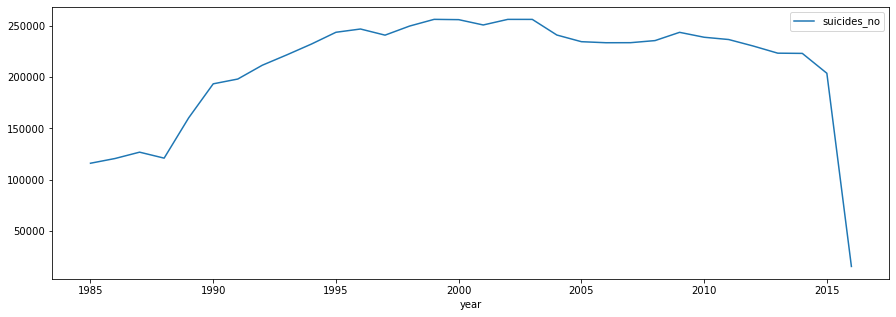

In [35]:
# yesr vs suicides numbers
data[['year', 'suicides_no']].groupby(['year']).sum().plot(figsize=(15,5))
plt.show()

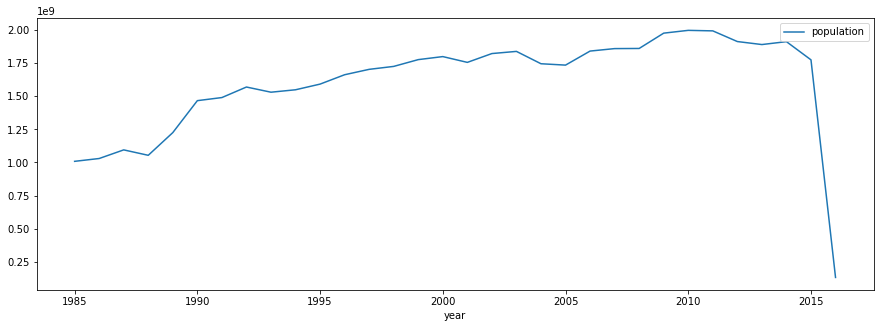

In [36]:
# population vs years
data[['year', 'population']].groupby(['year']).sum().plot(figsize=(15,5))
plt.show()

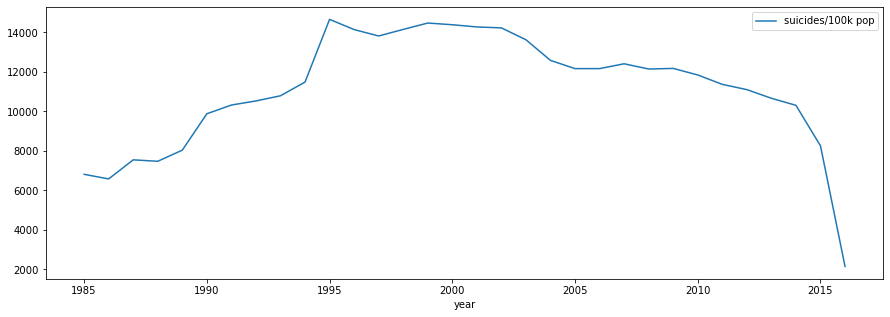

In [37]:
## suicides per 100k pop , changes over years
data[['year', 'suicides/100k pop']].groupby(['year']).sum().plot(figsize=(15,5))
plt.show()